In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400

In [2]:
import pandas as pd
Quarter = ['2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01']

Earnings = [-0.36, -0.38,  0.07,  1.85, -0.34, -0.42,  0.02,  2.11, -0.39,
       -0.4 ,  0.21,  2.1 , -0.39, -0.37,  0.2 ,  2.14, -0.35, -0.37,
        0.1 ,  2.26, -0.24, -0.38, -0.01,  2.02, -0.38, -0.36, -0.22,
        2.56, -0.42, -0.4 , -0.78,  1.58, -0.4 , -0.46, -0.13,  2.71,
       -0.35, -0.56, -0.34,  3.17, -0.55, -0.67, -0.45,  3.76]
dic = {'Quarter':Quarter, 'Earnings':Earnings}
df = pd.DataFrame(dic)

In [3]:
df['Quarter'] = pd.to_datetime(df['Quarter'])

In [4]:
df.set_index('Quarter', inplace=True)

In [5]:
# Compute the acf array of HRB
acf_array = acf(df)
print(acf_array)

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


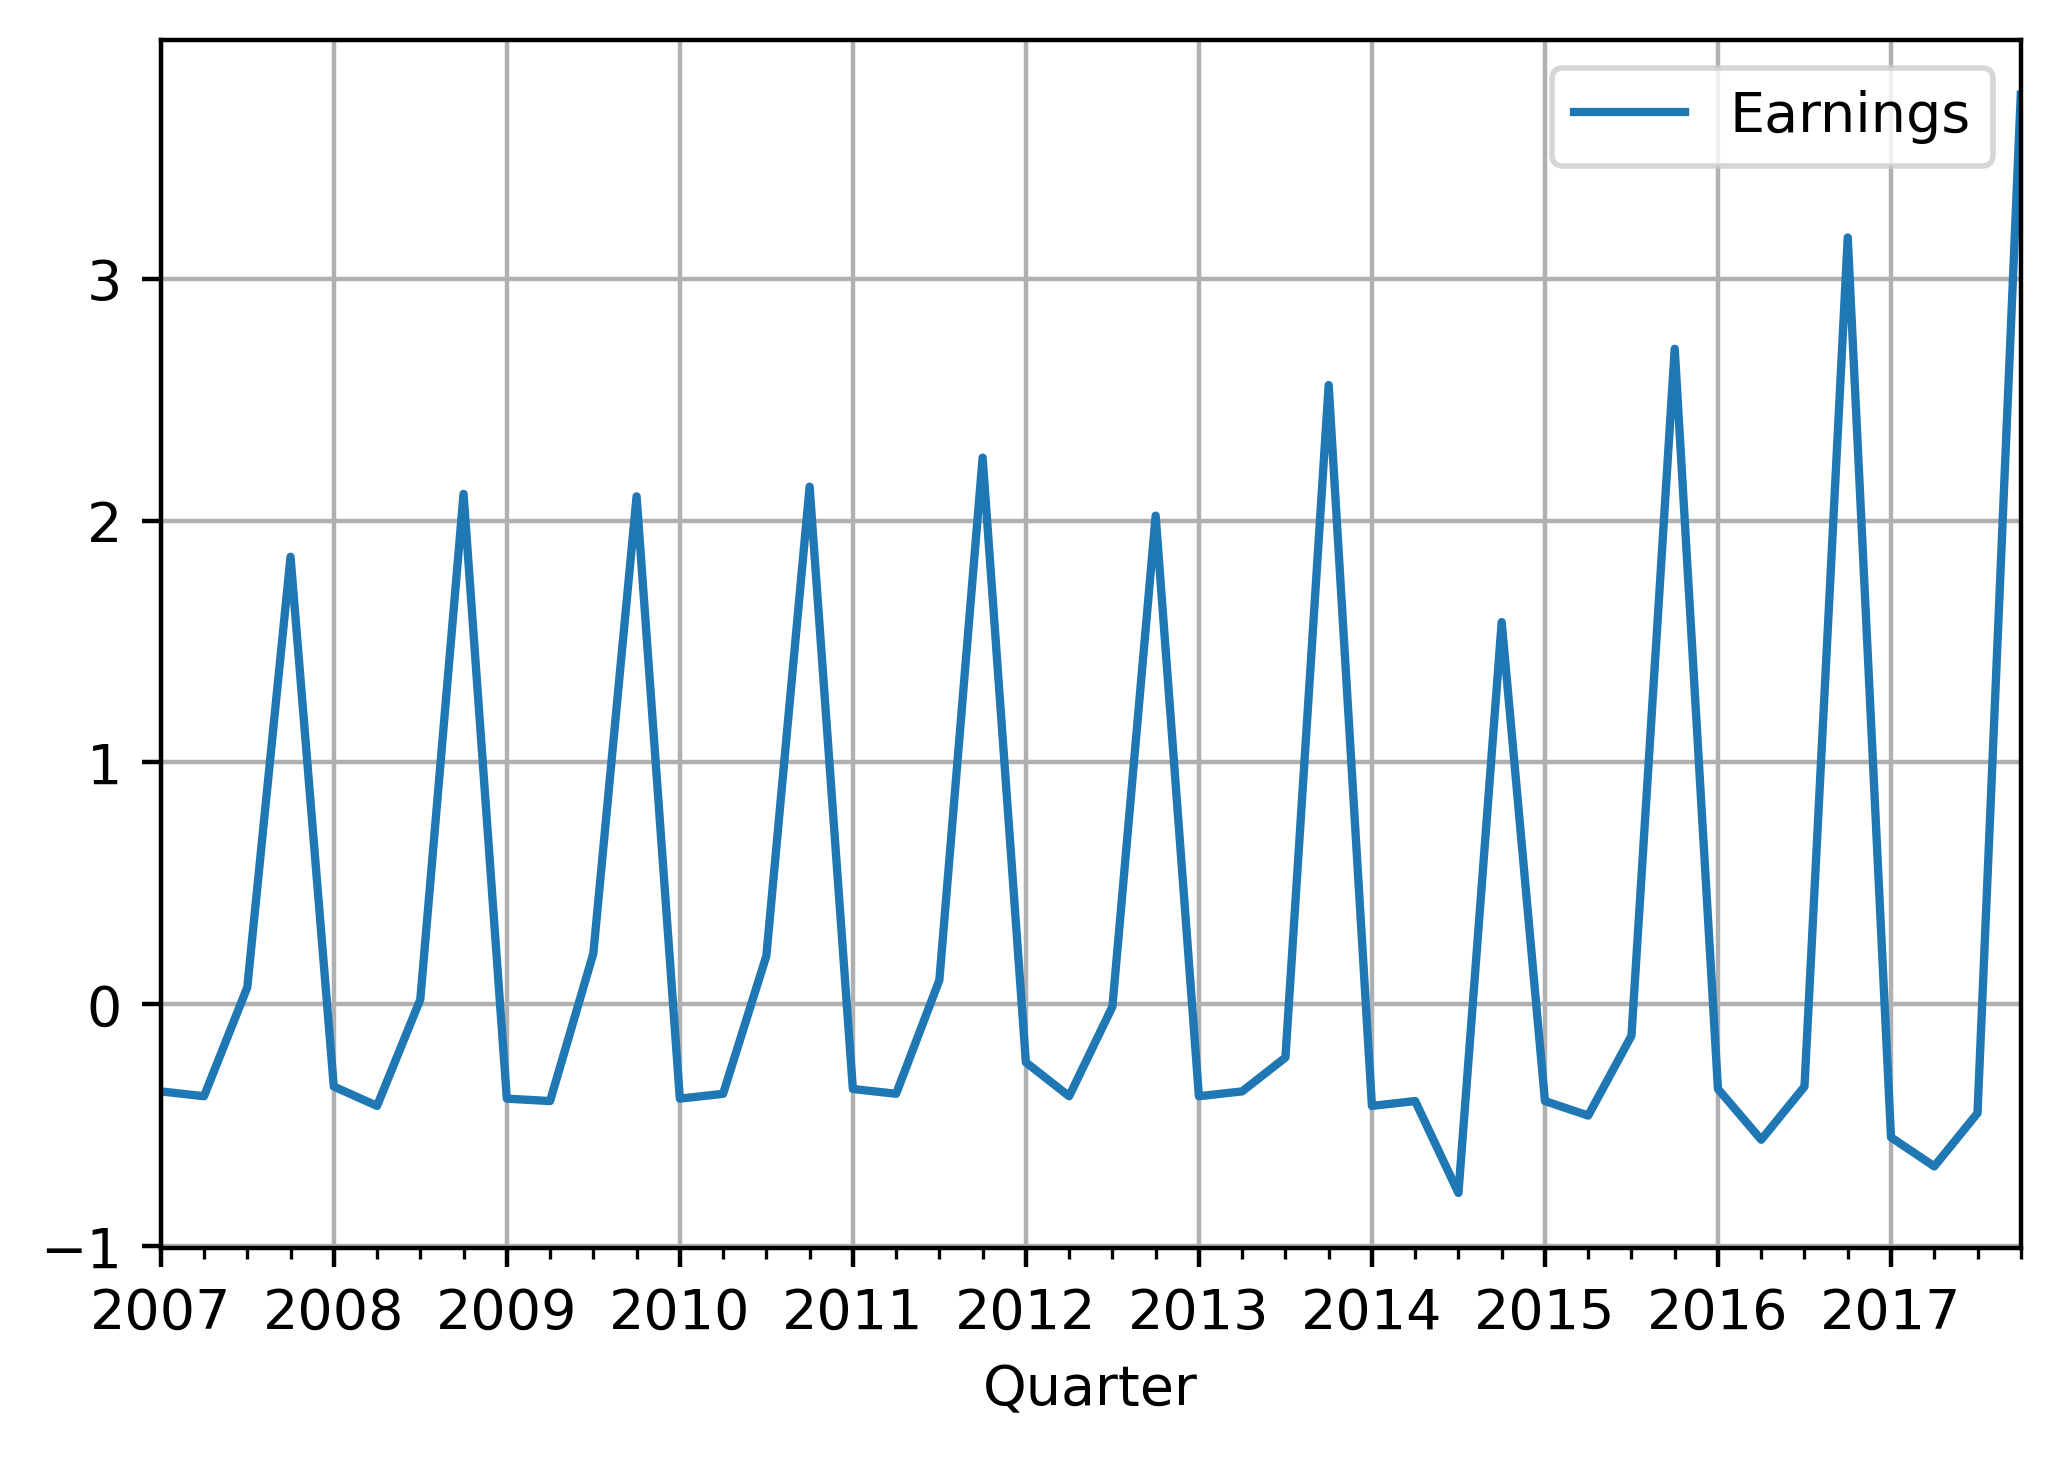

In [6]:
df.plot(grid=True)
plt.show()

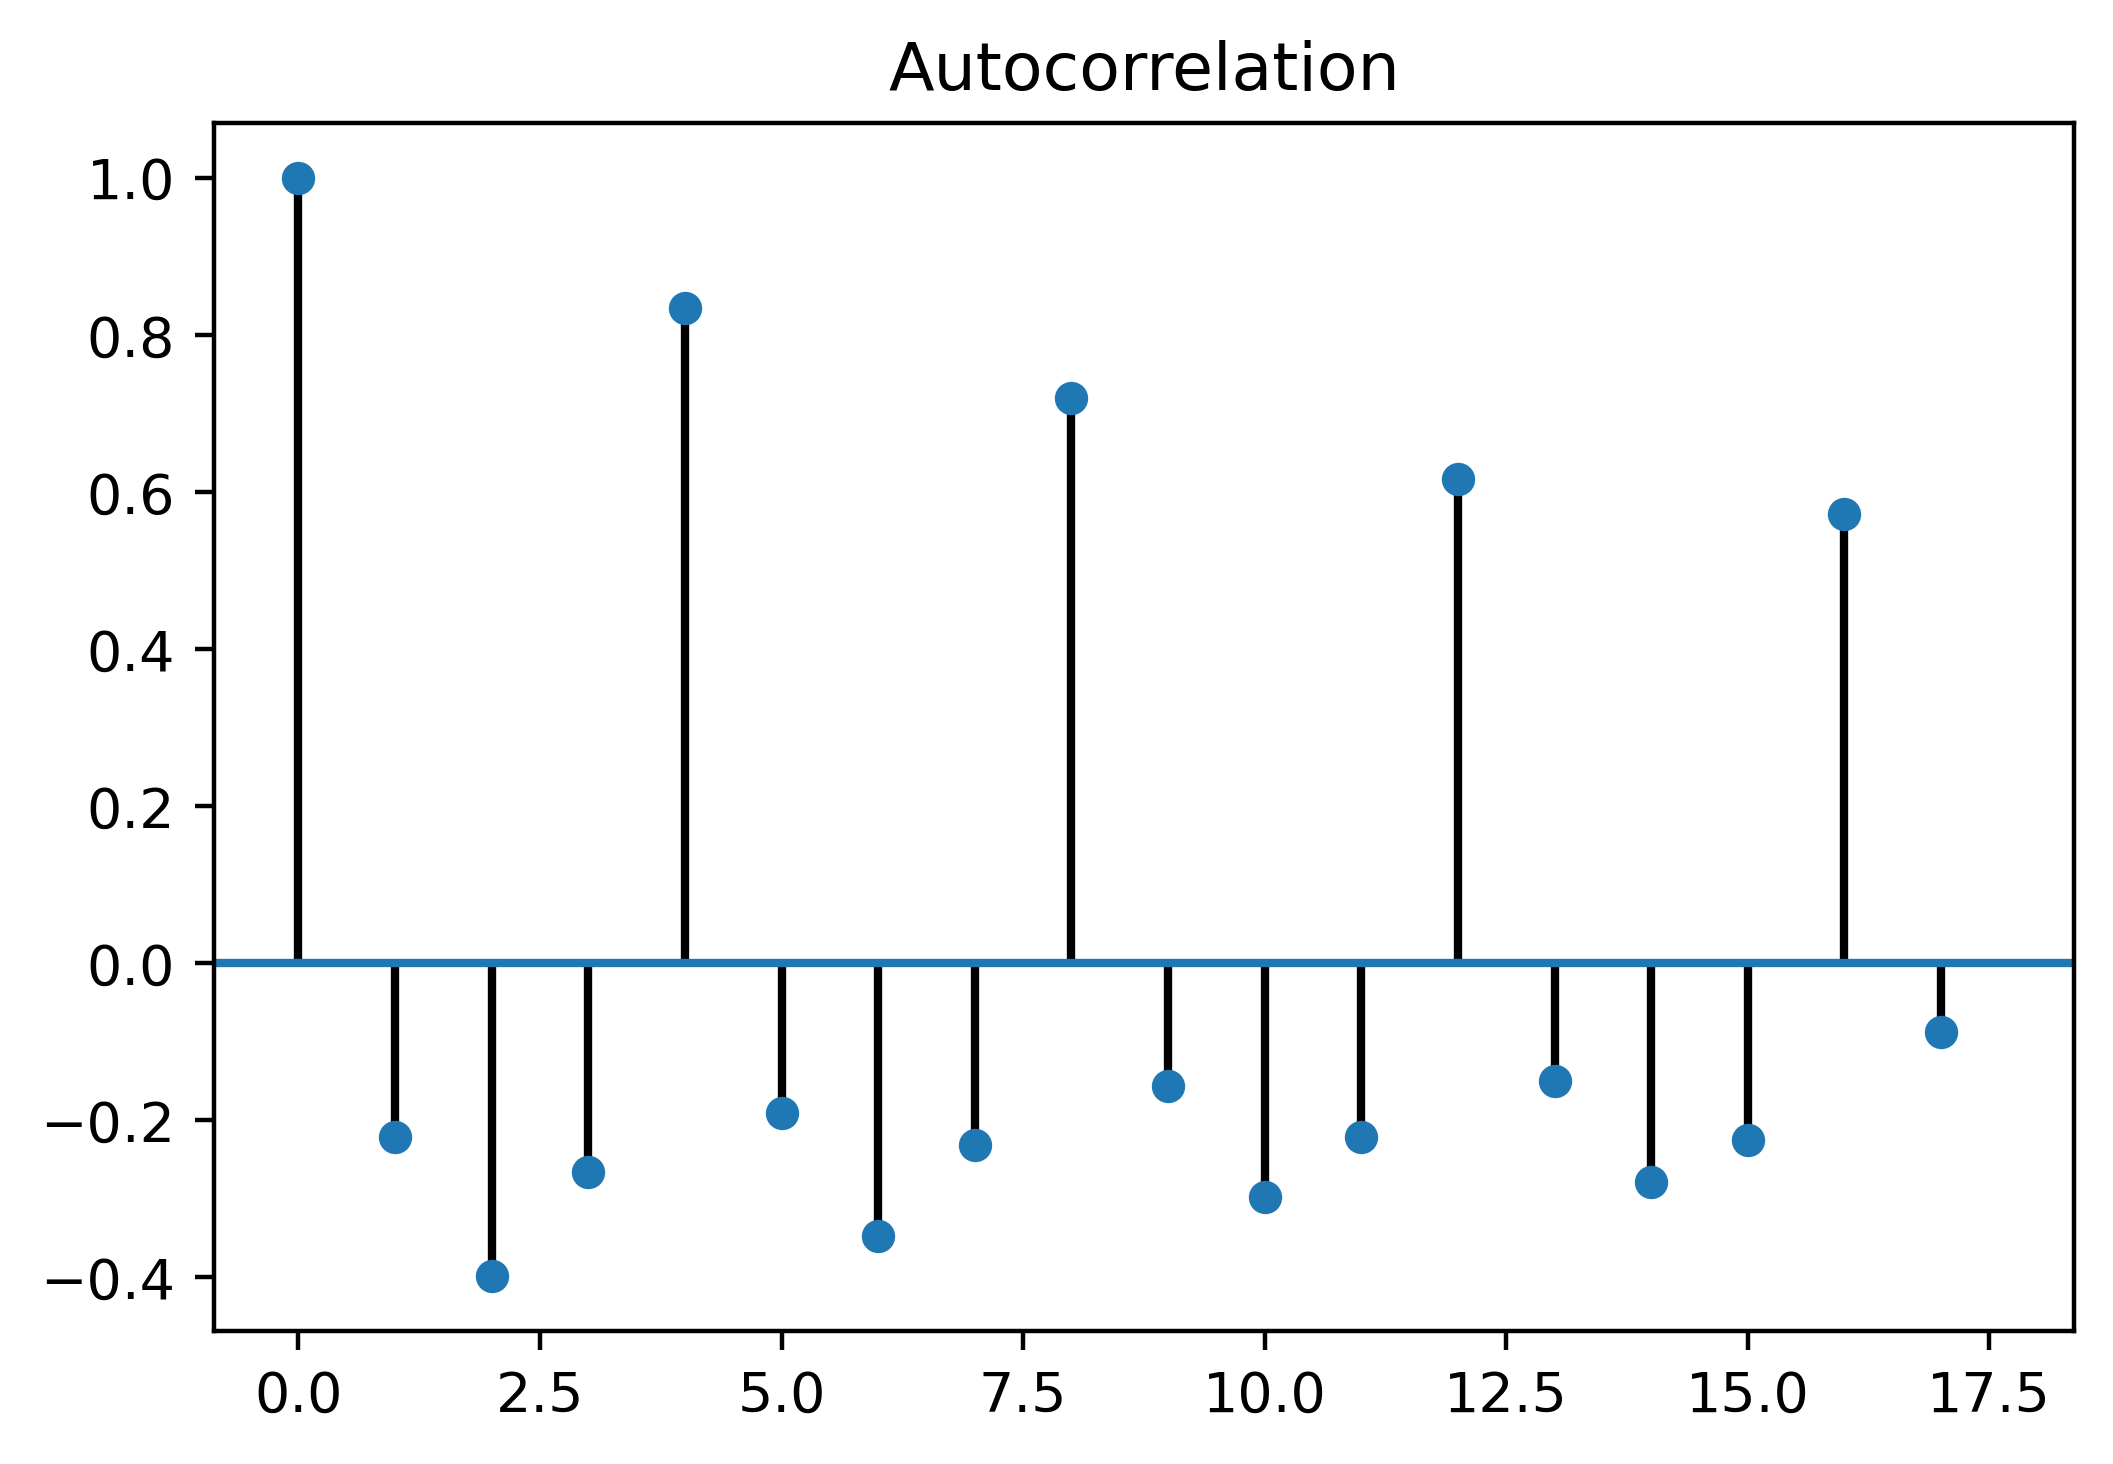

In [7]:
plot_acf(df, alpha=1)
plt.show()

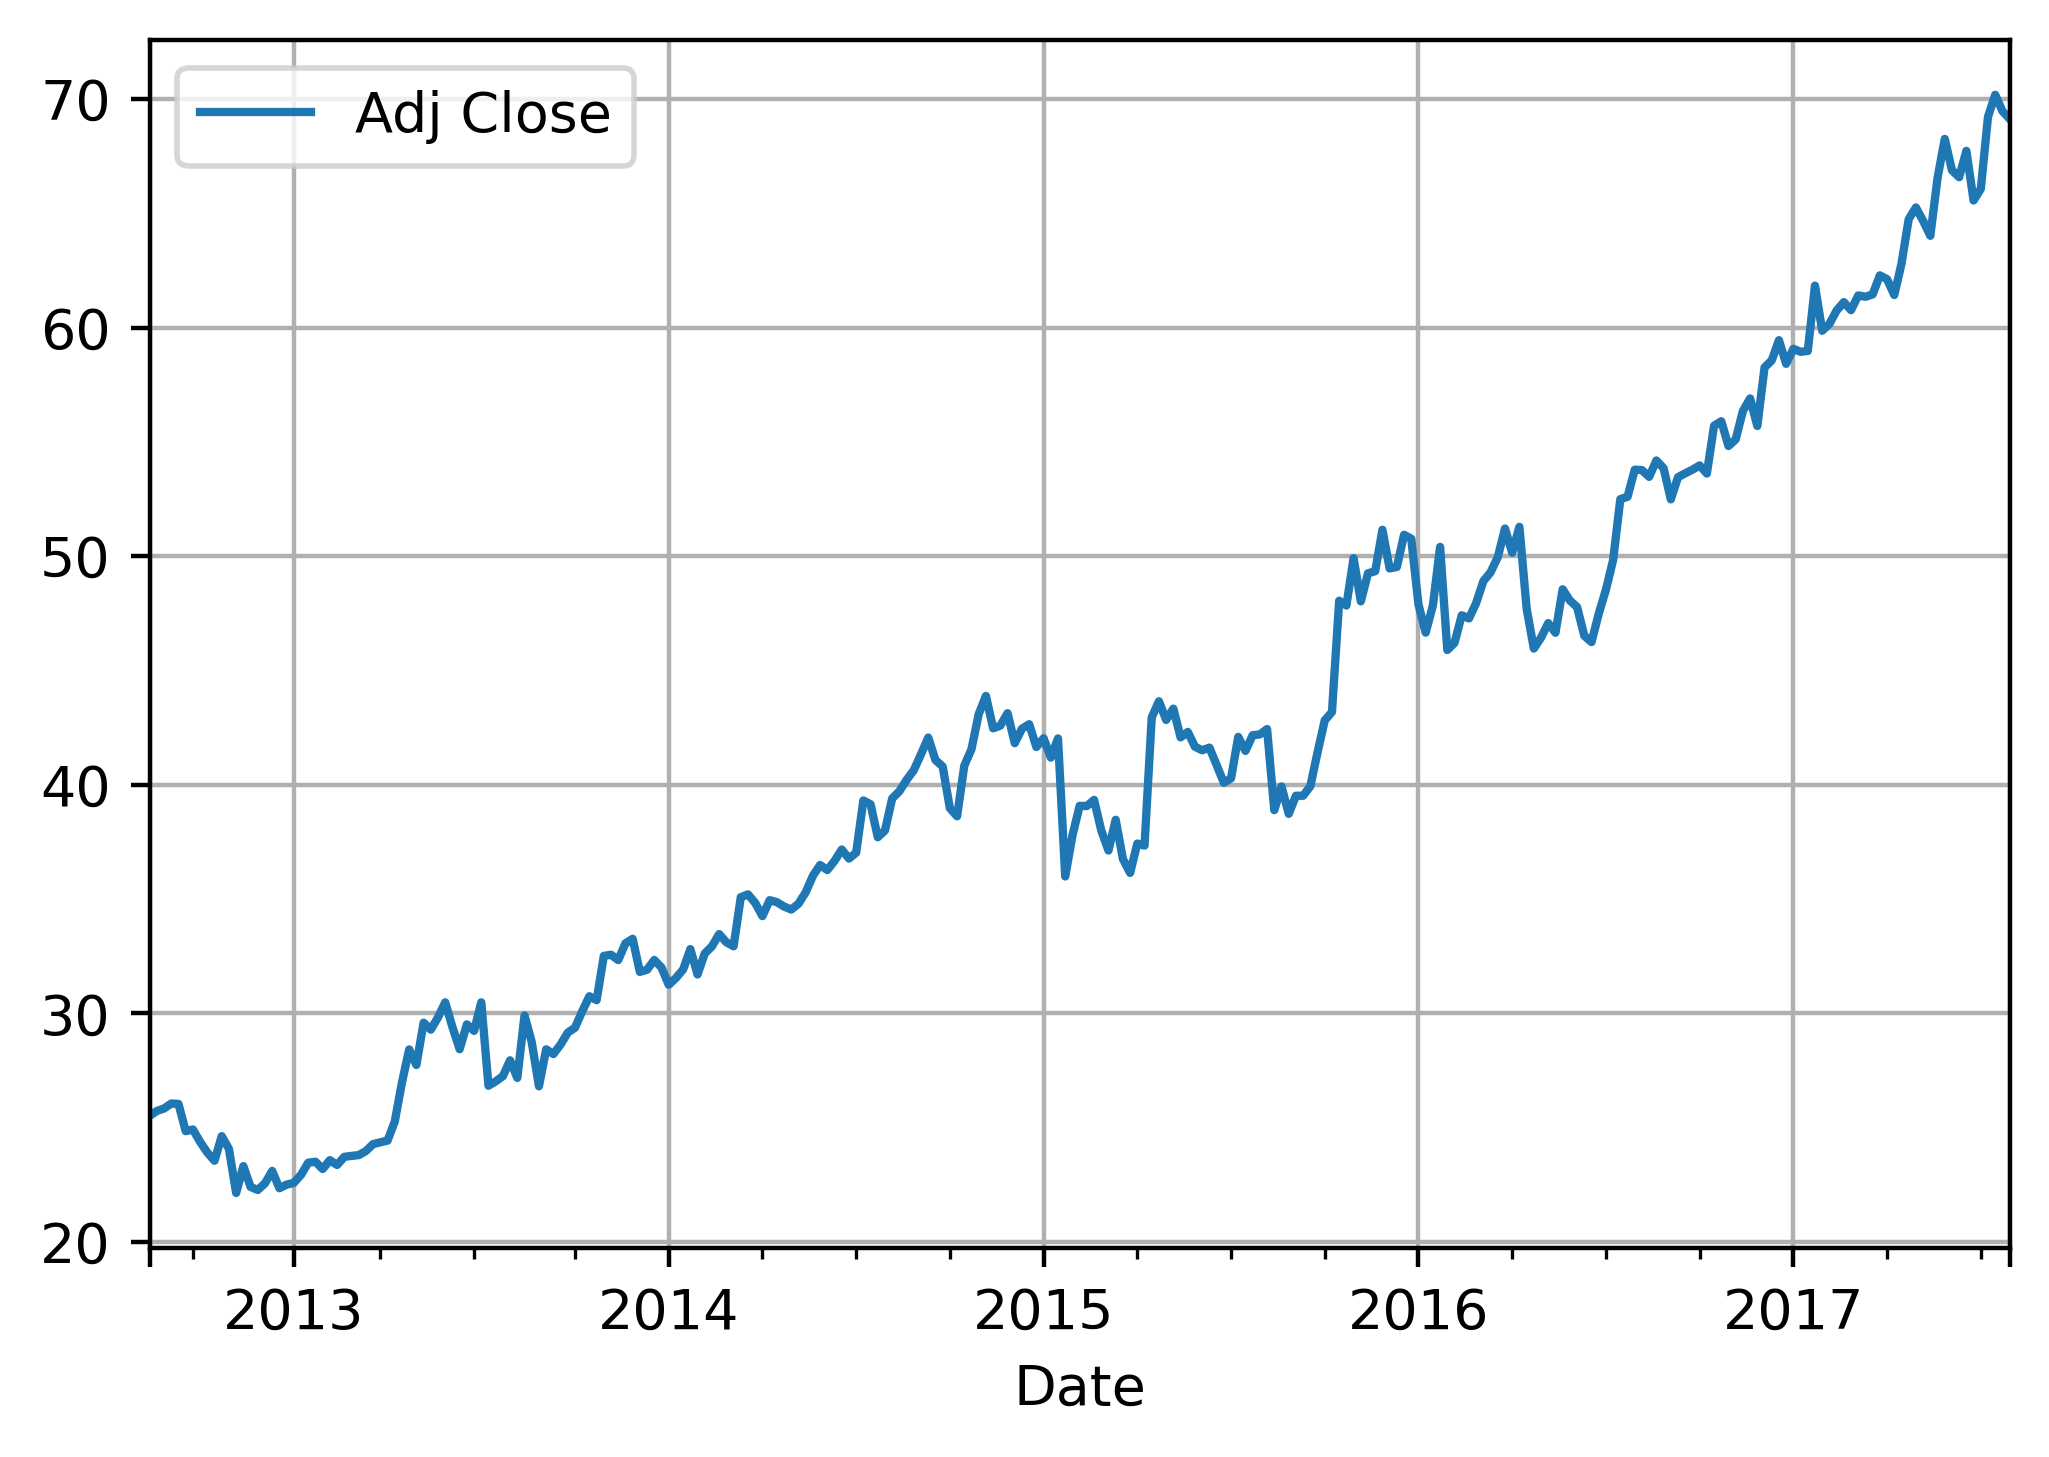

In [8]:
df = pd.read_csv('data/MSFT.csv')
df = df[['Date', 'Adj Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.plot(grid=True)
plt.show()

In [9]:
df.head()

,Adj Close
Date,
2012-08-20,25.505810
2012-08-27,25.722813
2012-09-03,25.831312
2012-09-10,26.048307
2012-09-17,26.031620


In [10]:
returns1 = df.pct_change()
returns1.head()

,Adj Close
Date,
2012-08-20,NaN
2012-08-27,0.008508
2012-09-03,0.004218
2012-09-10,0.008400
2012-09-17,-0.000641


In [11]:
df = df['Adj Close'].resample('W').last()

In [12]:
weekly_diff = df.diff()

In [13]:
weekly_diff = pd.DataFrame(weekly_diff)
weekly_diff

,Adj Close
Date,
2012-08-26,NaN
2012-09-02,0.217003
2012-09-09,0.108499
2012-09-16,0.216995
2012-09-23,-0.016687
...,...
2017-07-09,0.504120
2017-07-16,3.157814
2017-07-23,0.960647


In [14]:
autocorrelation_yearly = weekly_diff['Adj Close'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of annual interest rate changes is -0.14


In [15]:
weekly_diff['Return'] = weekly_diff['Adj Close'].pct_change()

In [16]:
weekly_diff = weekly_diff.iloc[2:]

In [17]:
weekly_diff

,Adj Close,Return
Date,,
2012-09-09,0.108499,-0.500012
2012-09-16,0.216995,0.999972
2012-09-23,-0.016687,-1.076900
2012-09-30,-1.193500,70.522742
2012-10-07,0.075117,-1.062938
...,...,...
2017-07-09,0.504120,-1.232462
2017-07-16,3.157814,5.264013
2017-07-23,0.960647,-0.695787


In [18]:
autocorrelation = weekly_diff['Return'].autocorr()
autocorrelation

nan

The autocorrelation of weekly MSFT returns is -0.14
The approximate confidence interval is +/- 0.12


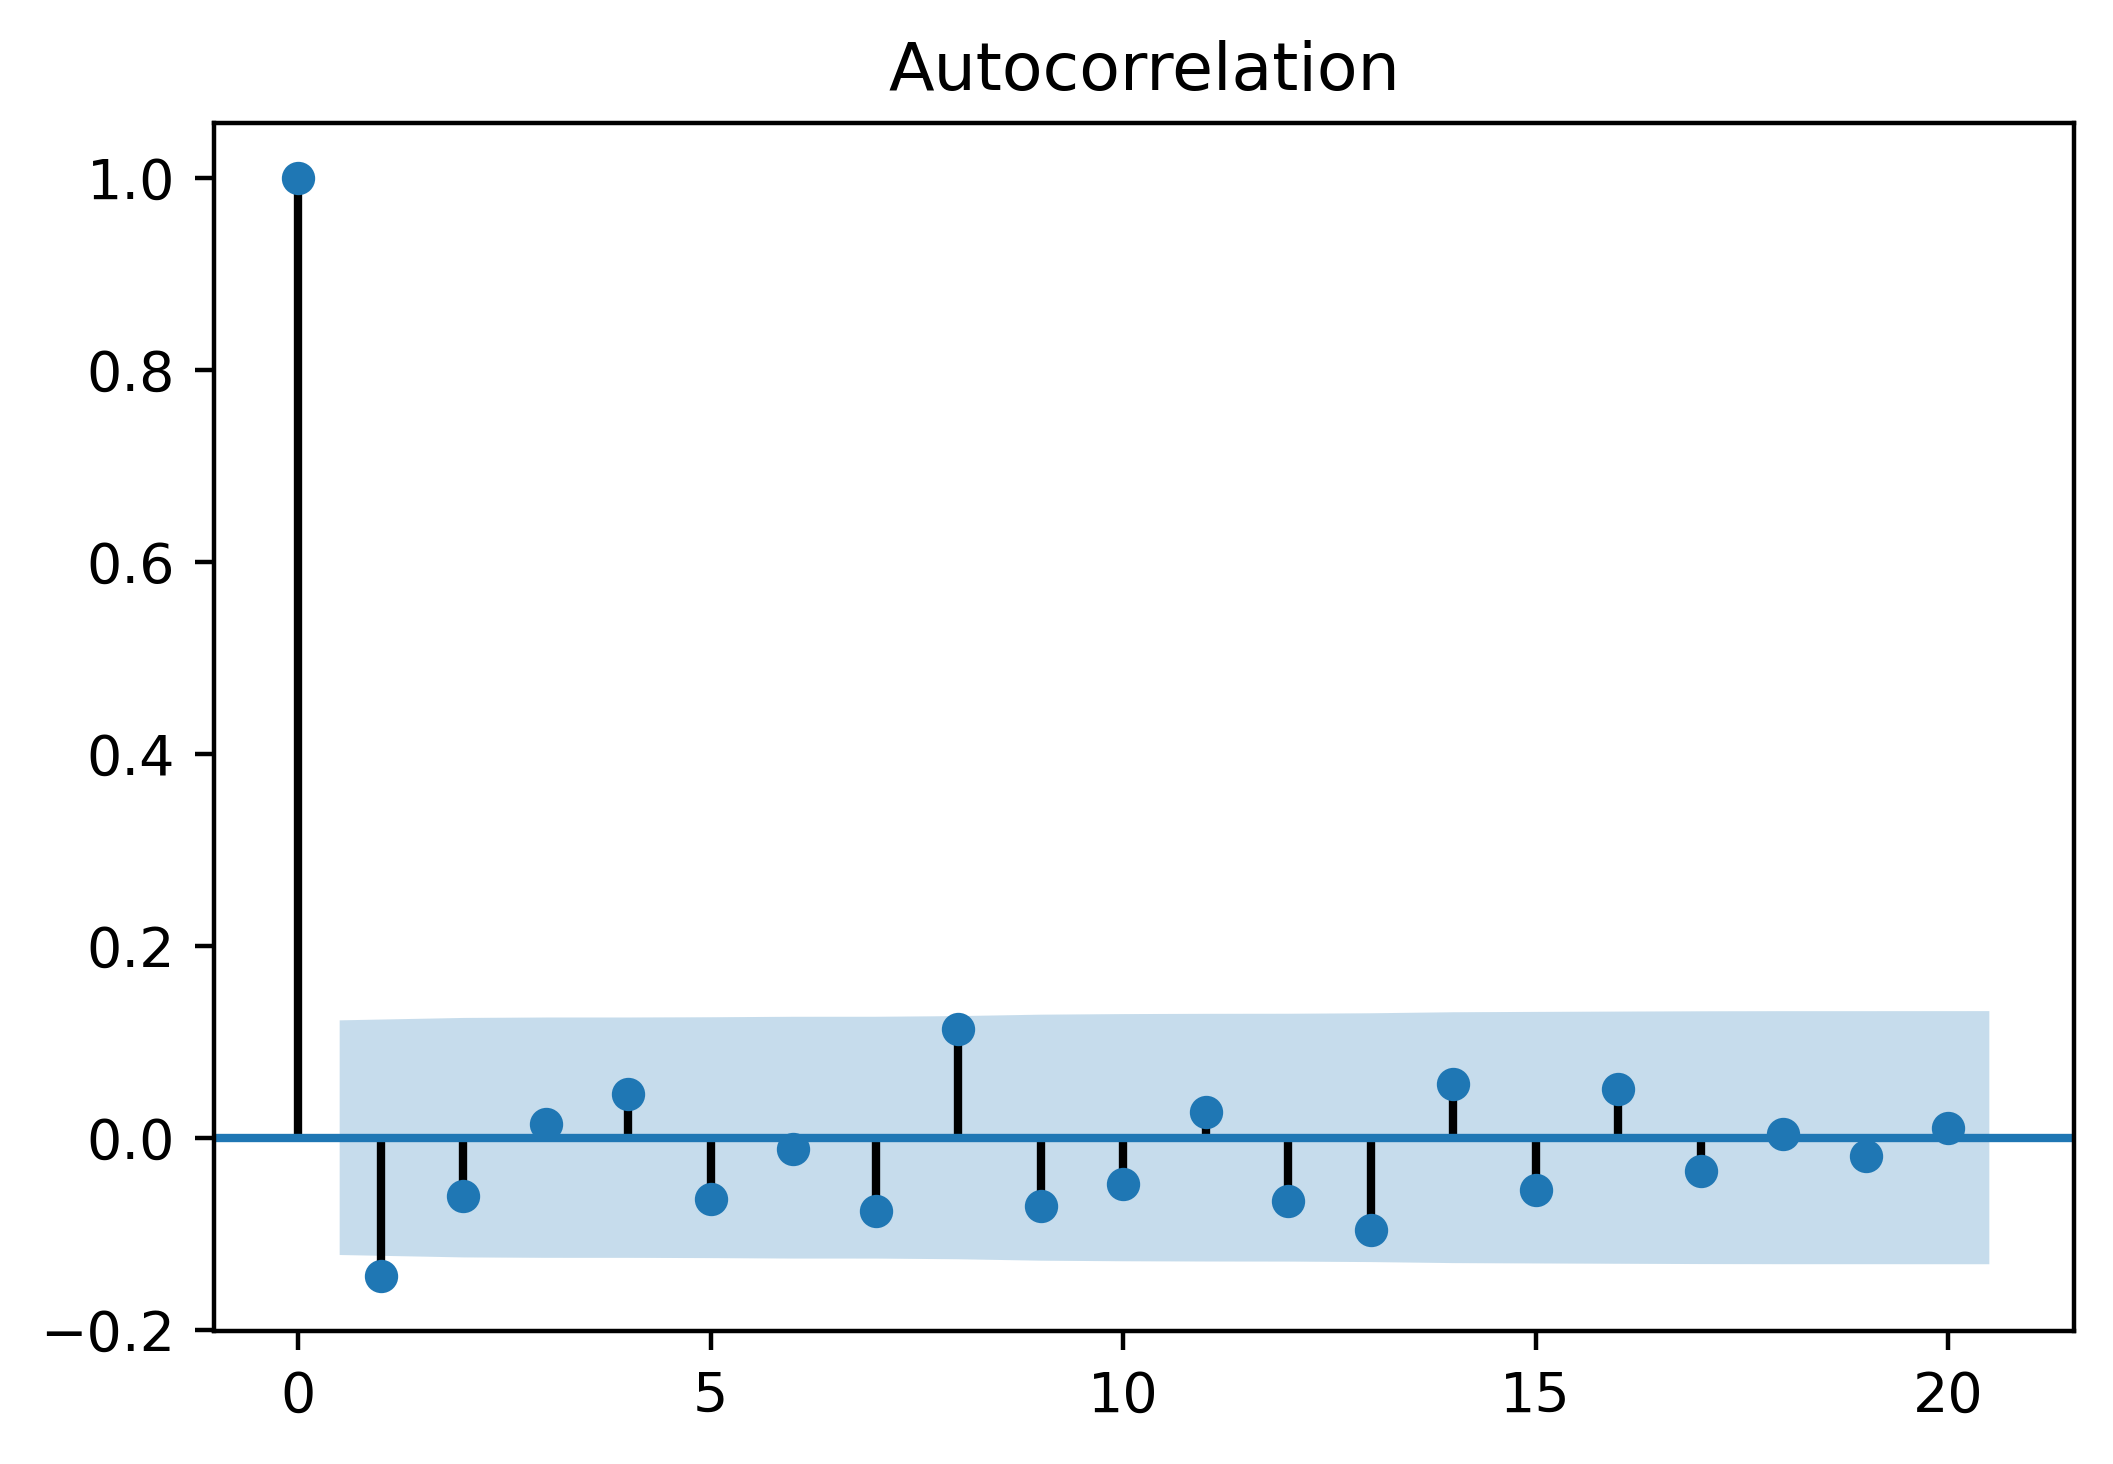

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
autocorrelation = weekly_diff['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))
nobs = len(weekly_diff)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))
plot_acf(weekly_diff['Adj Close'], alpha=0.05, lags=20)
plt.show()

In [20]:
import numpy as np
noise = np.random.normal(0,1,500)

noise = pd.DataFrame(noise)

noise.columns = ['noise']

noise.head()

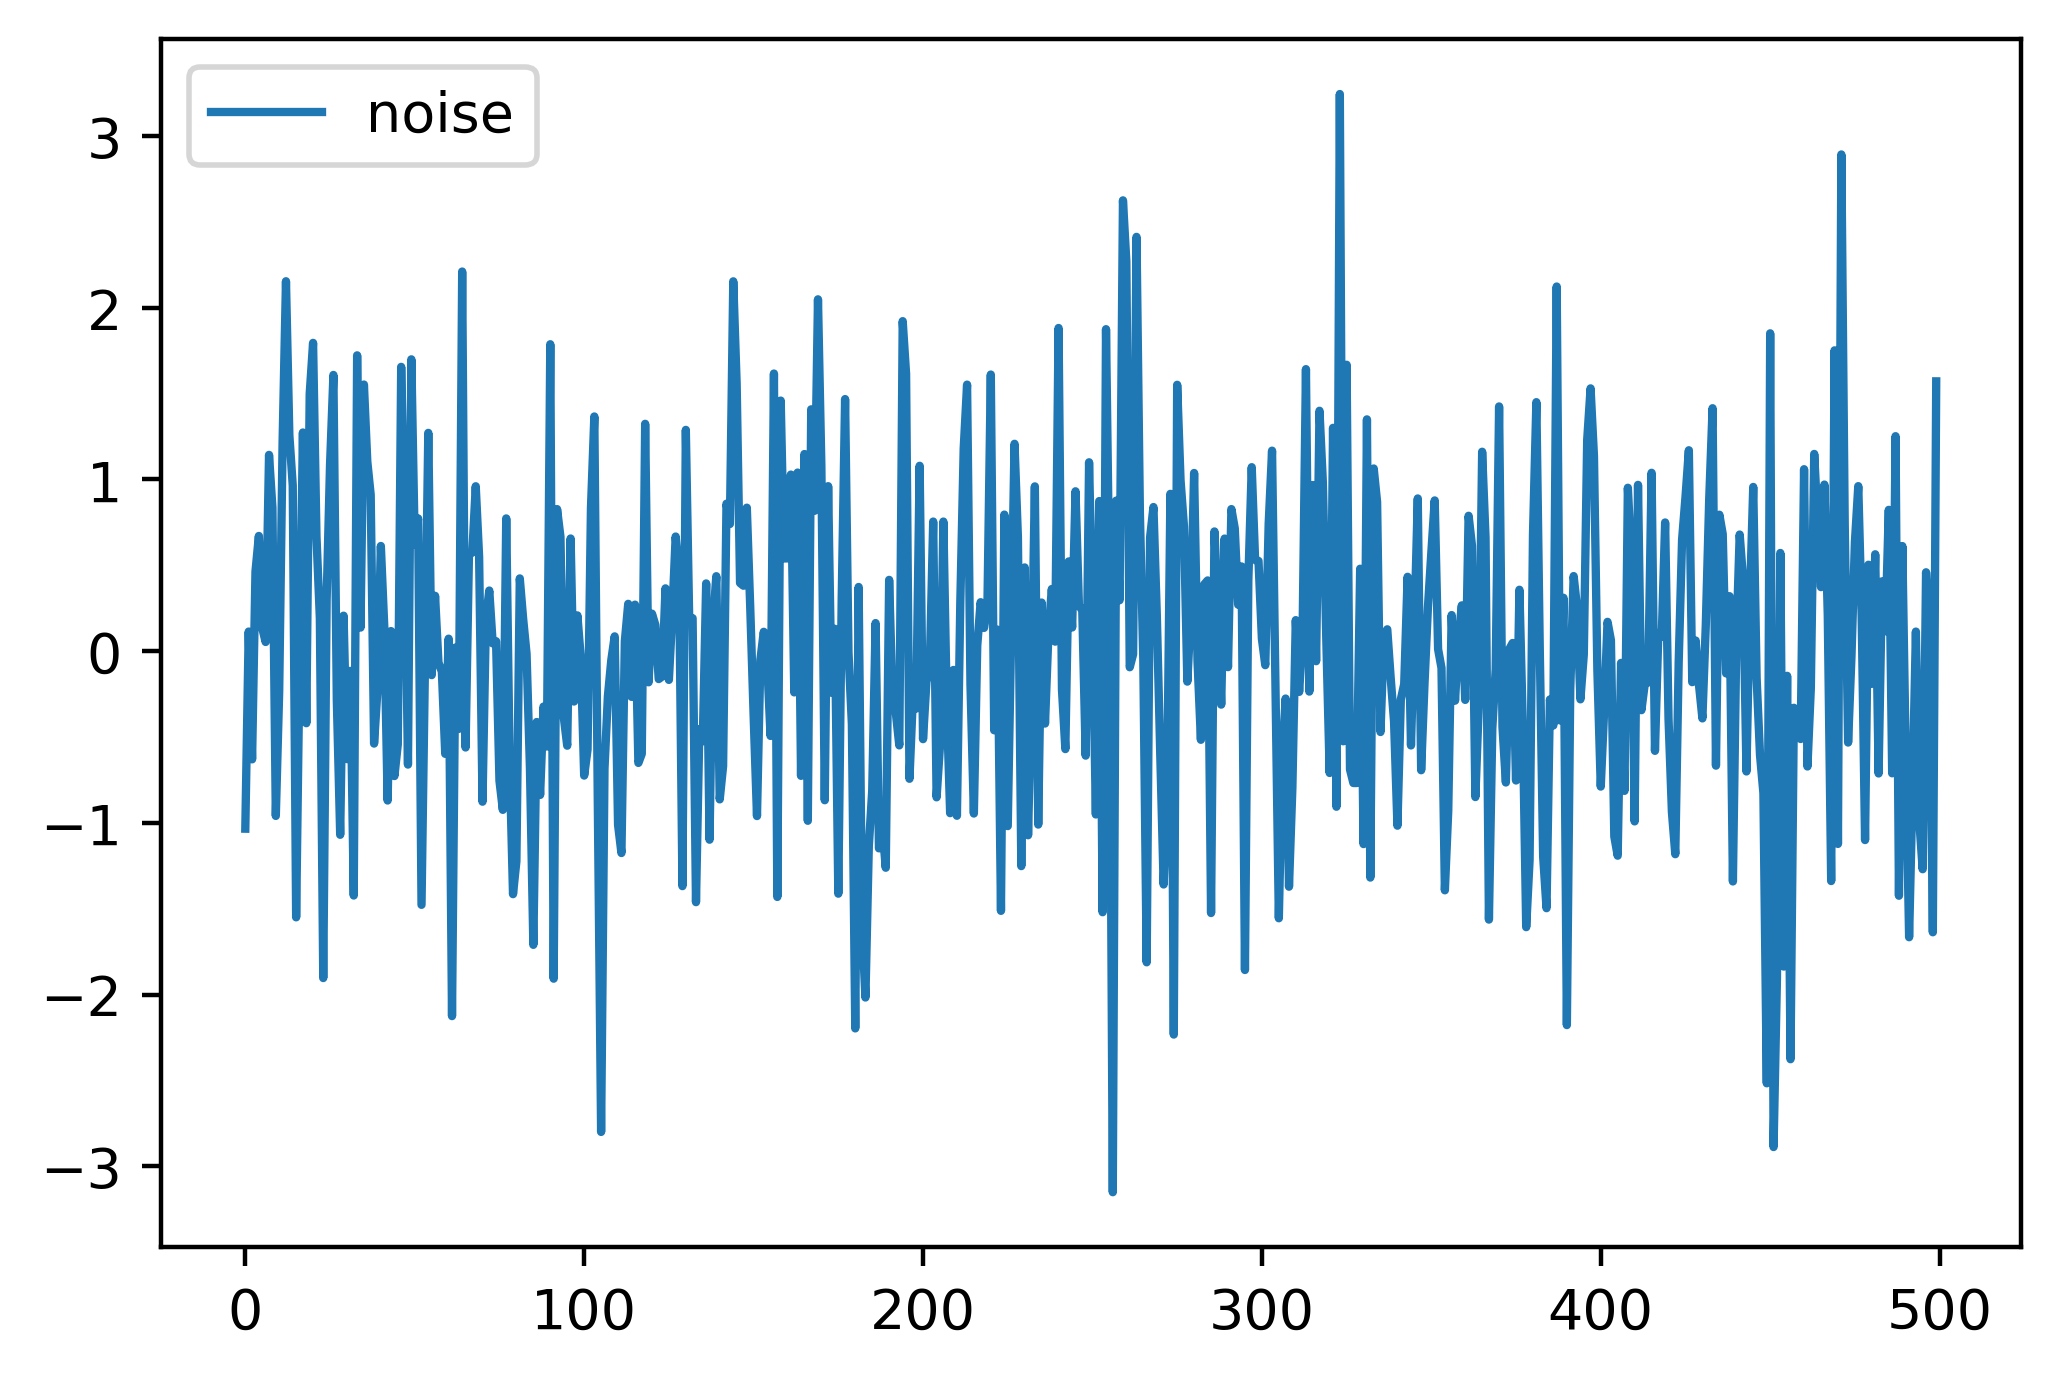

In [24]:
noise.plot()

The autocorrelation of weekly MSFT returns is -0.01
The approximate confidence interval is +/- 0.12


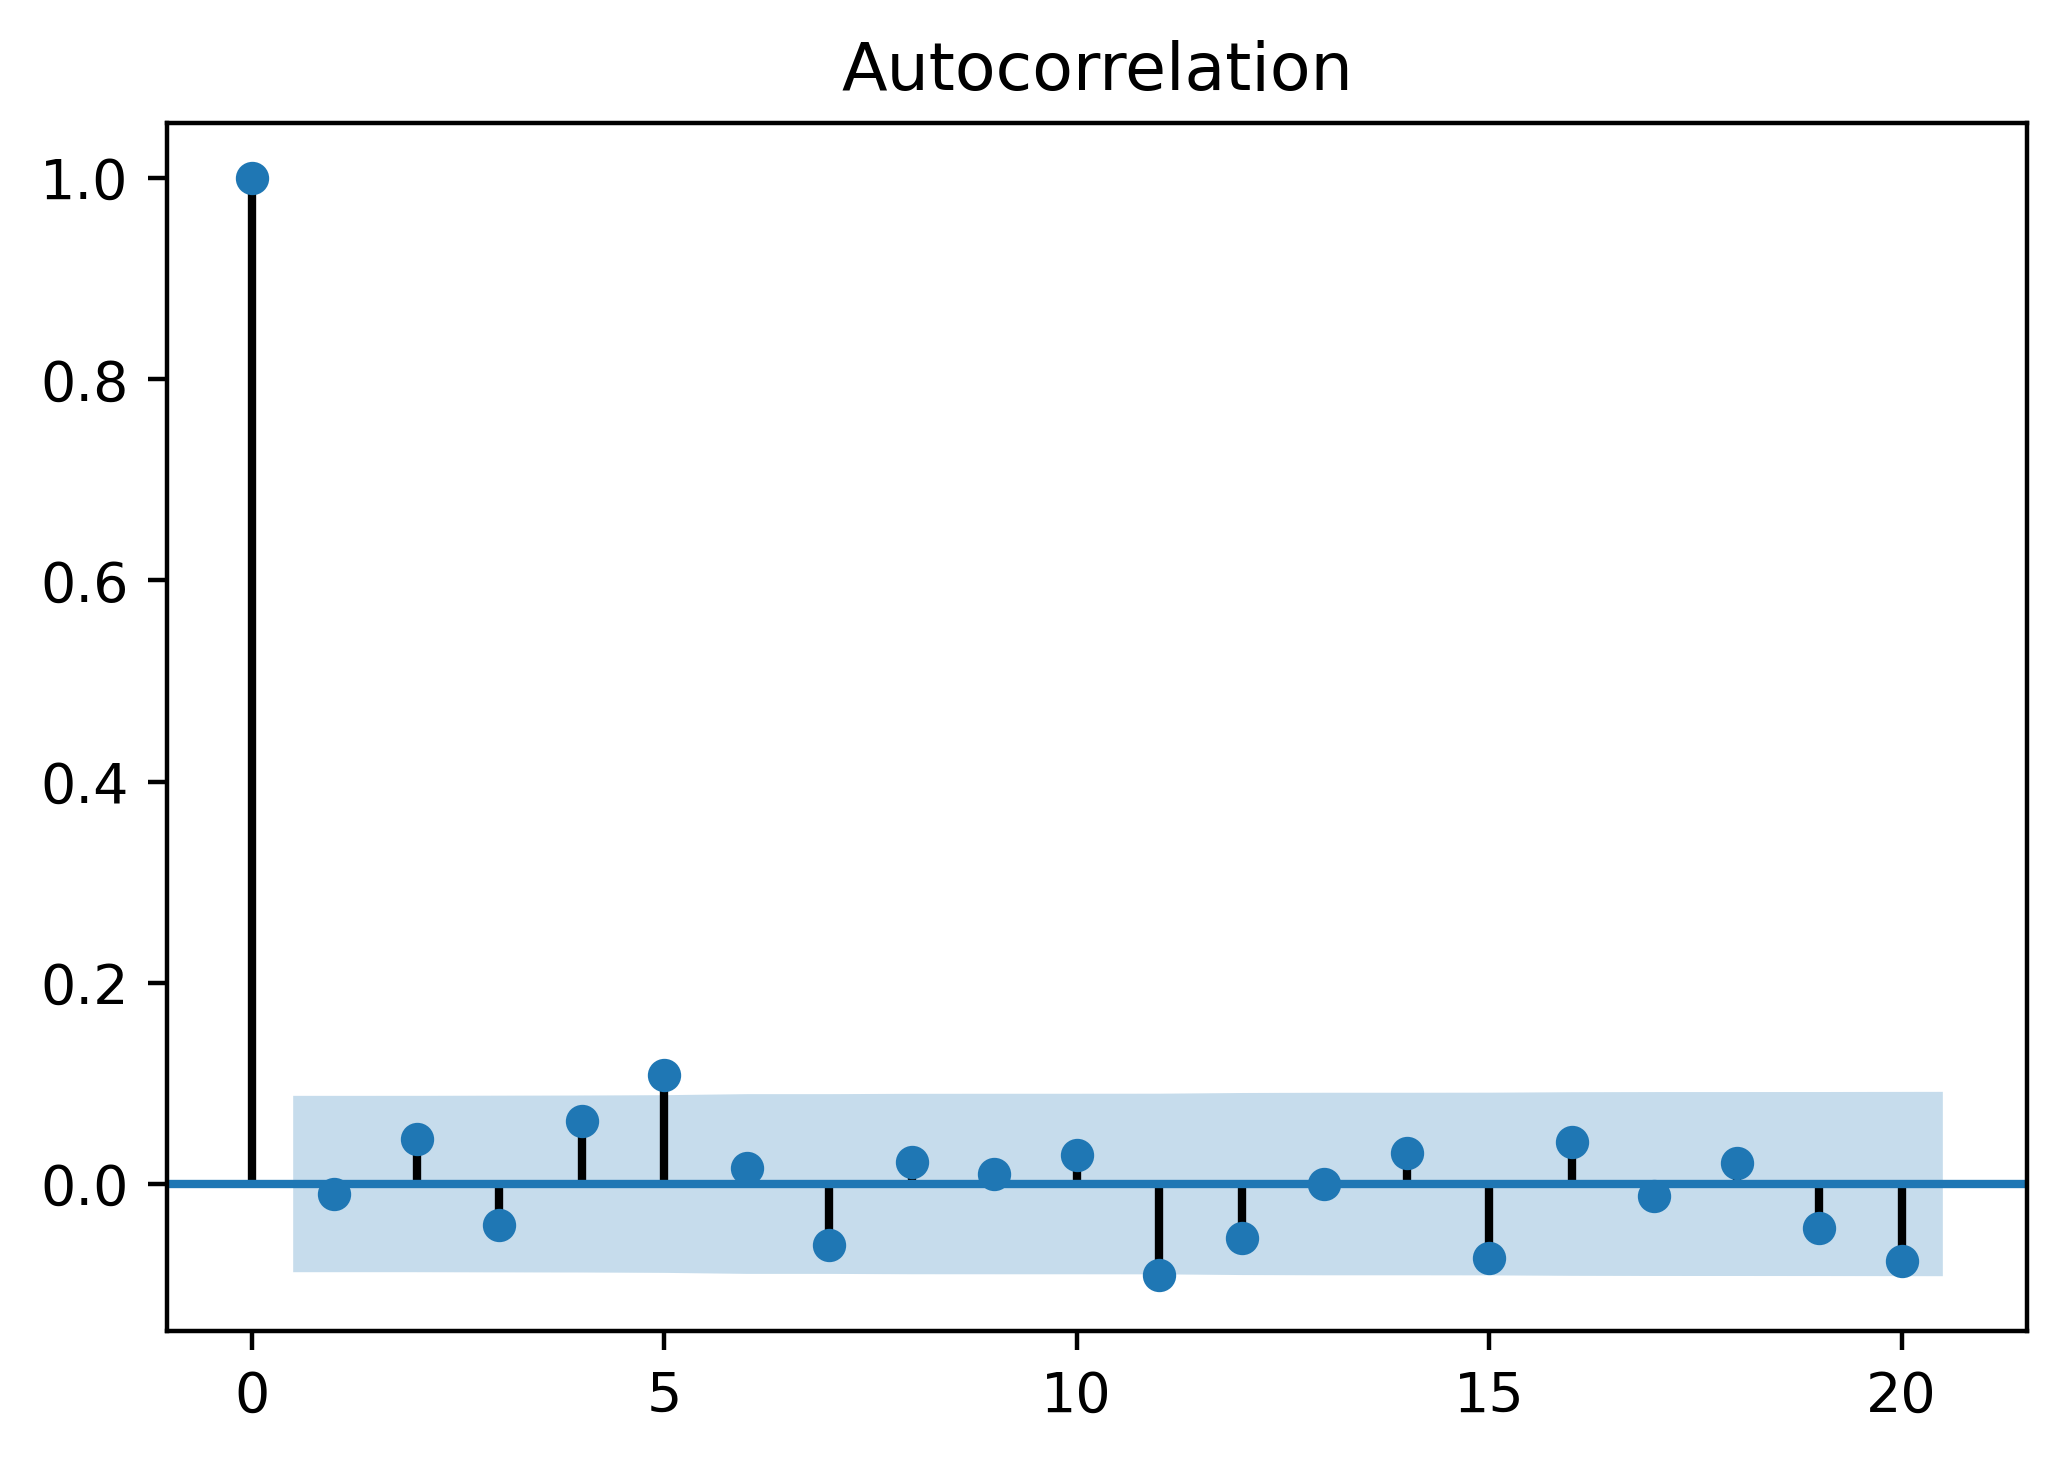

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
autocorrelation = noise['noise'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))
nobs = len(weekly_diff)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))
plot_acf(noise['noise'], alpha=0.05, lags=20)
plt.show()

In [26]:
df = pd.read_csv('data/SP500.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df['SP500'] = pd.to_numeric(df['SP500'], errors='coerce')
df.dtypes

SP500    float64
dtype: object

In [27]:
df = df.dropna()

In [28]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,SP500
DATE,


In [29]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(df['SP500'])
print(results[1])

0.9469227628050167


In [30]:
results

(-0.12469330080826739,
 0.9469227628050167,
 27,
 2489,
 {'1%': -3.4329799947351503,
  '5%': -2.862701915447137,
  '10%': -2.5673885329713495},
 22861.475740047455)

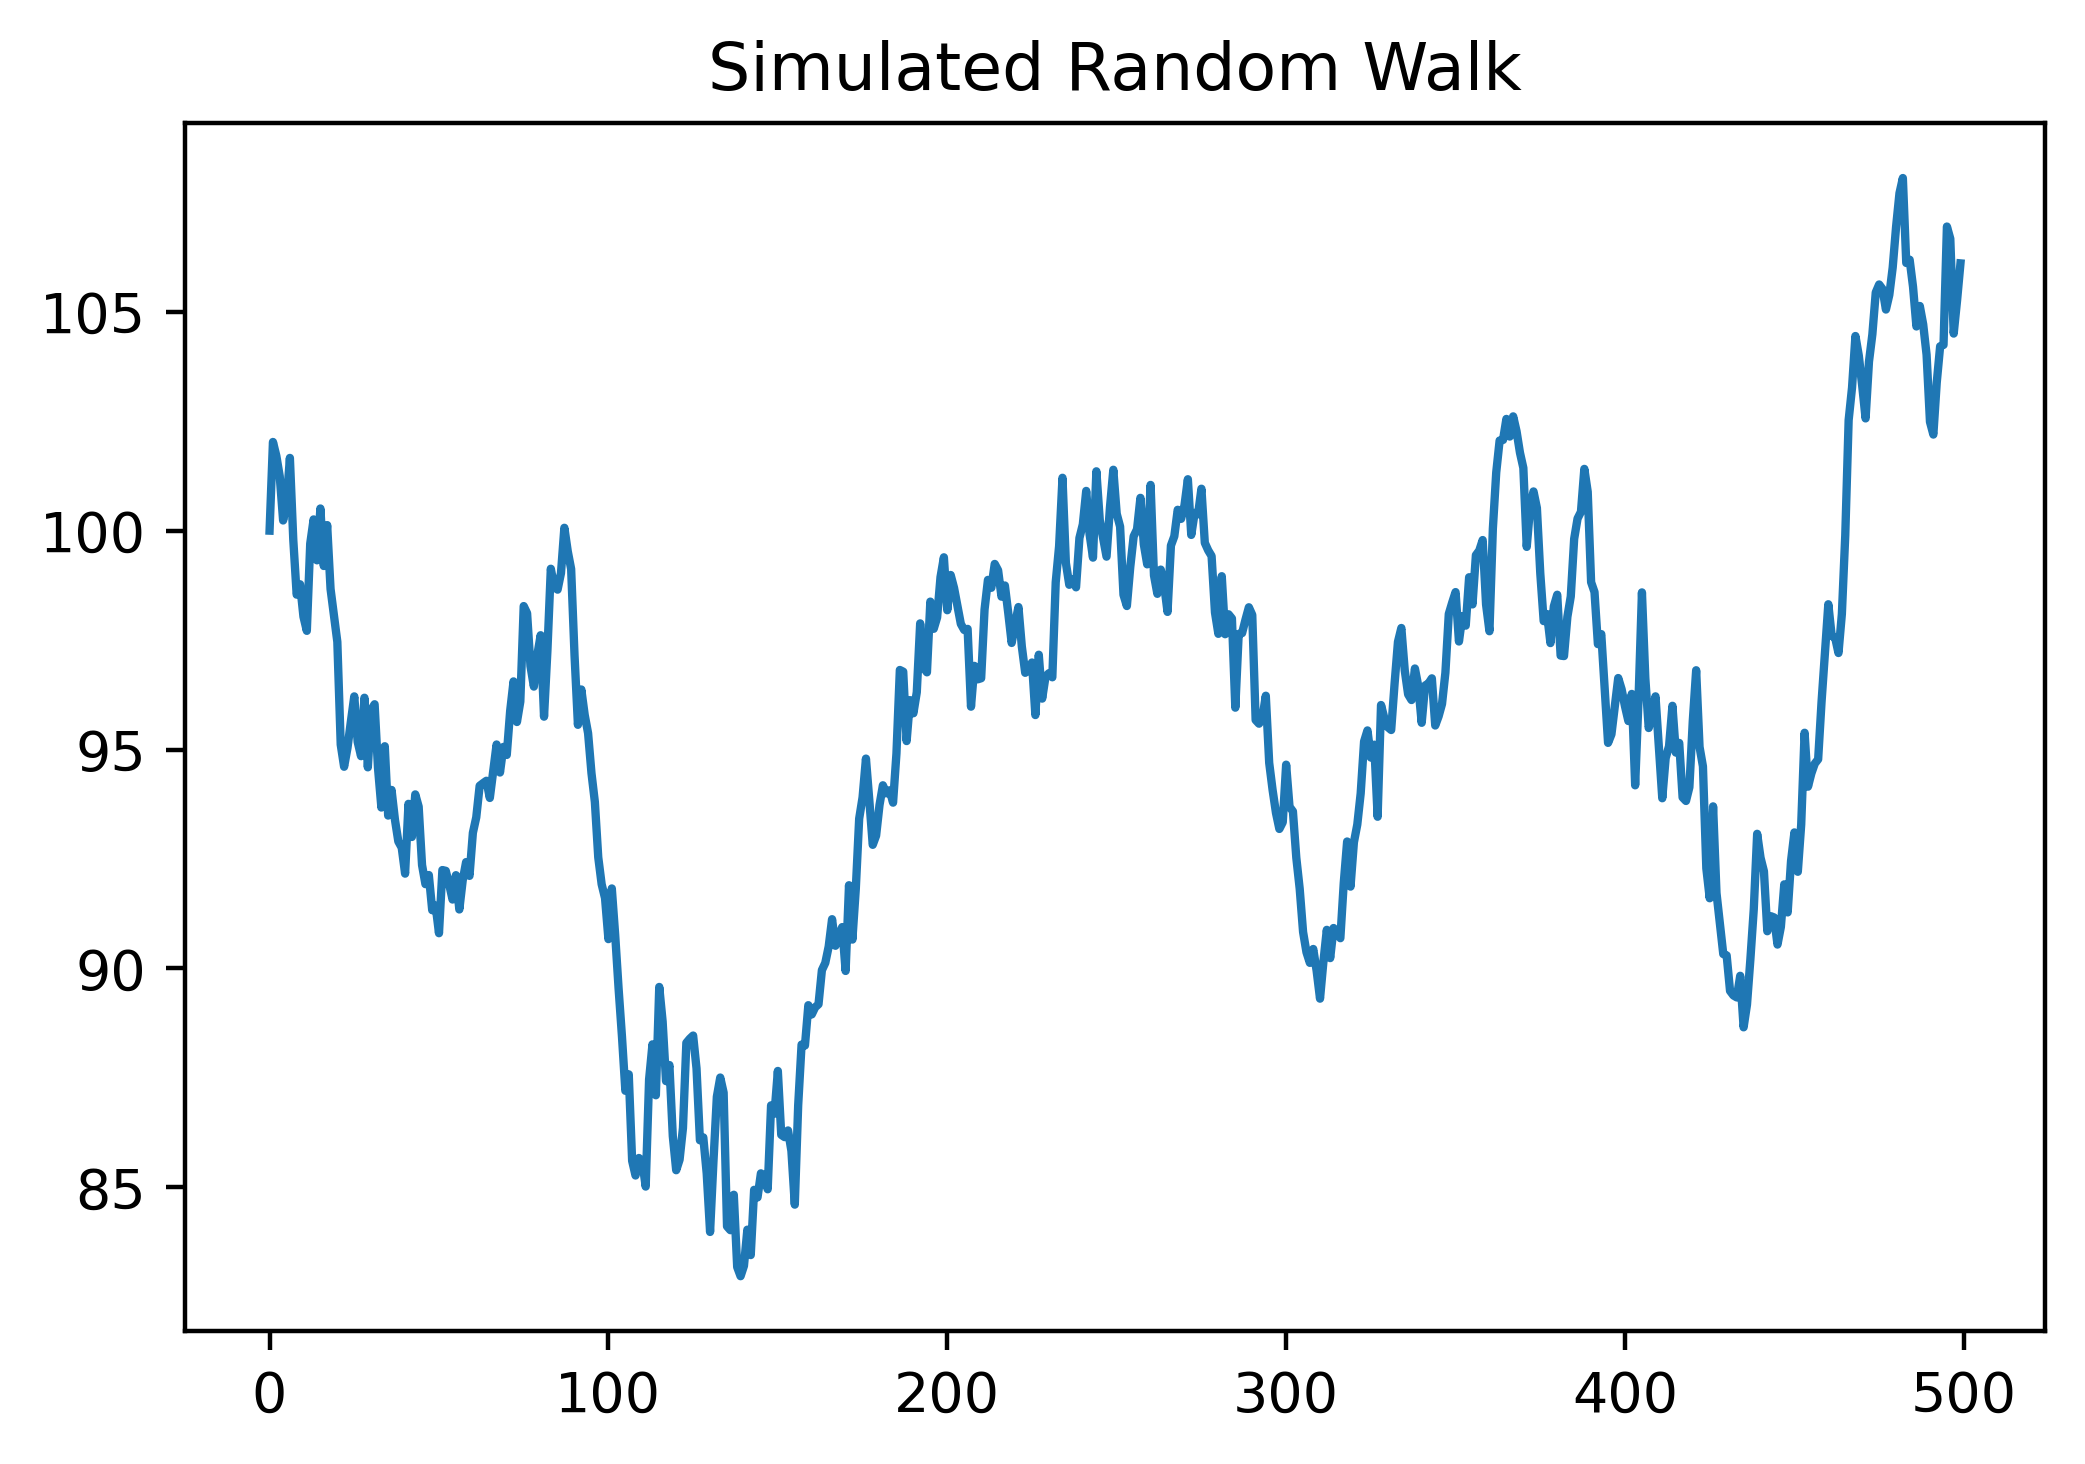

In [31]:
steps = np.random.normal(loc=0, scale=1.0, size=500)
steps[0]=0
P = 100 + np.cumsum(steps)
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

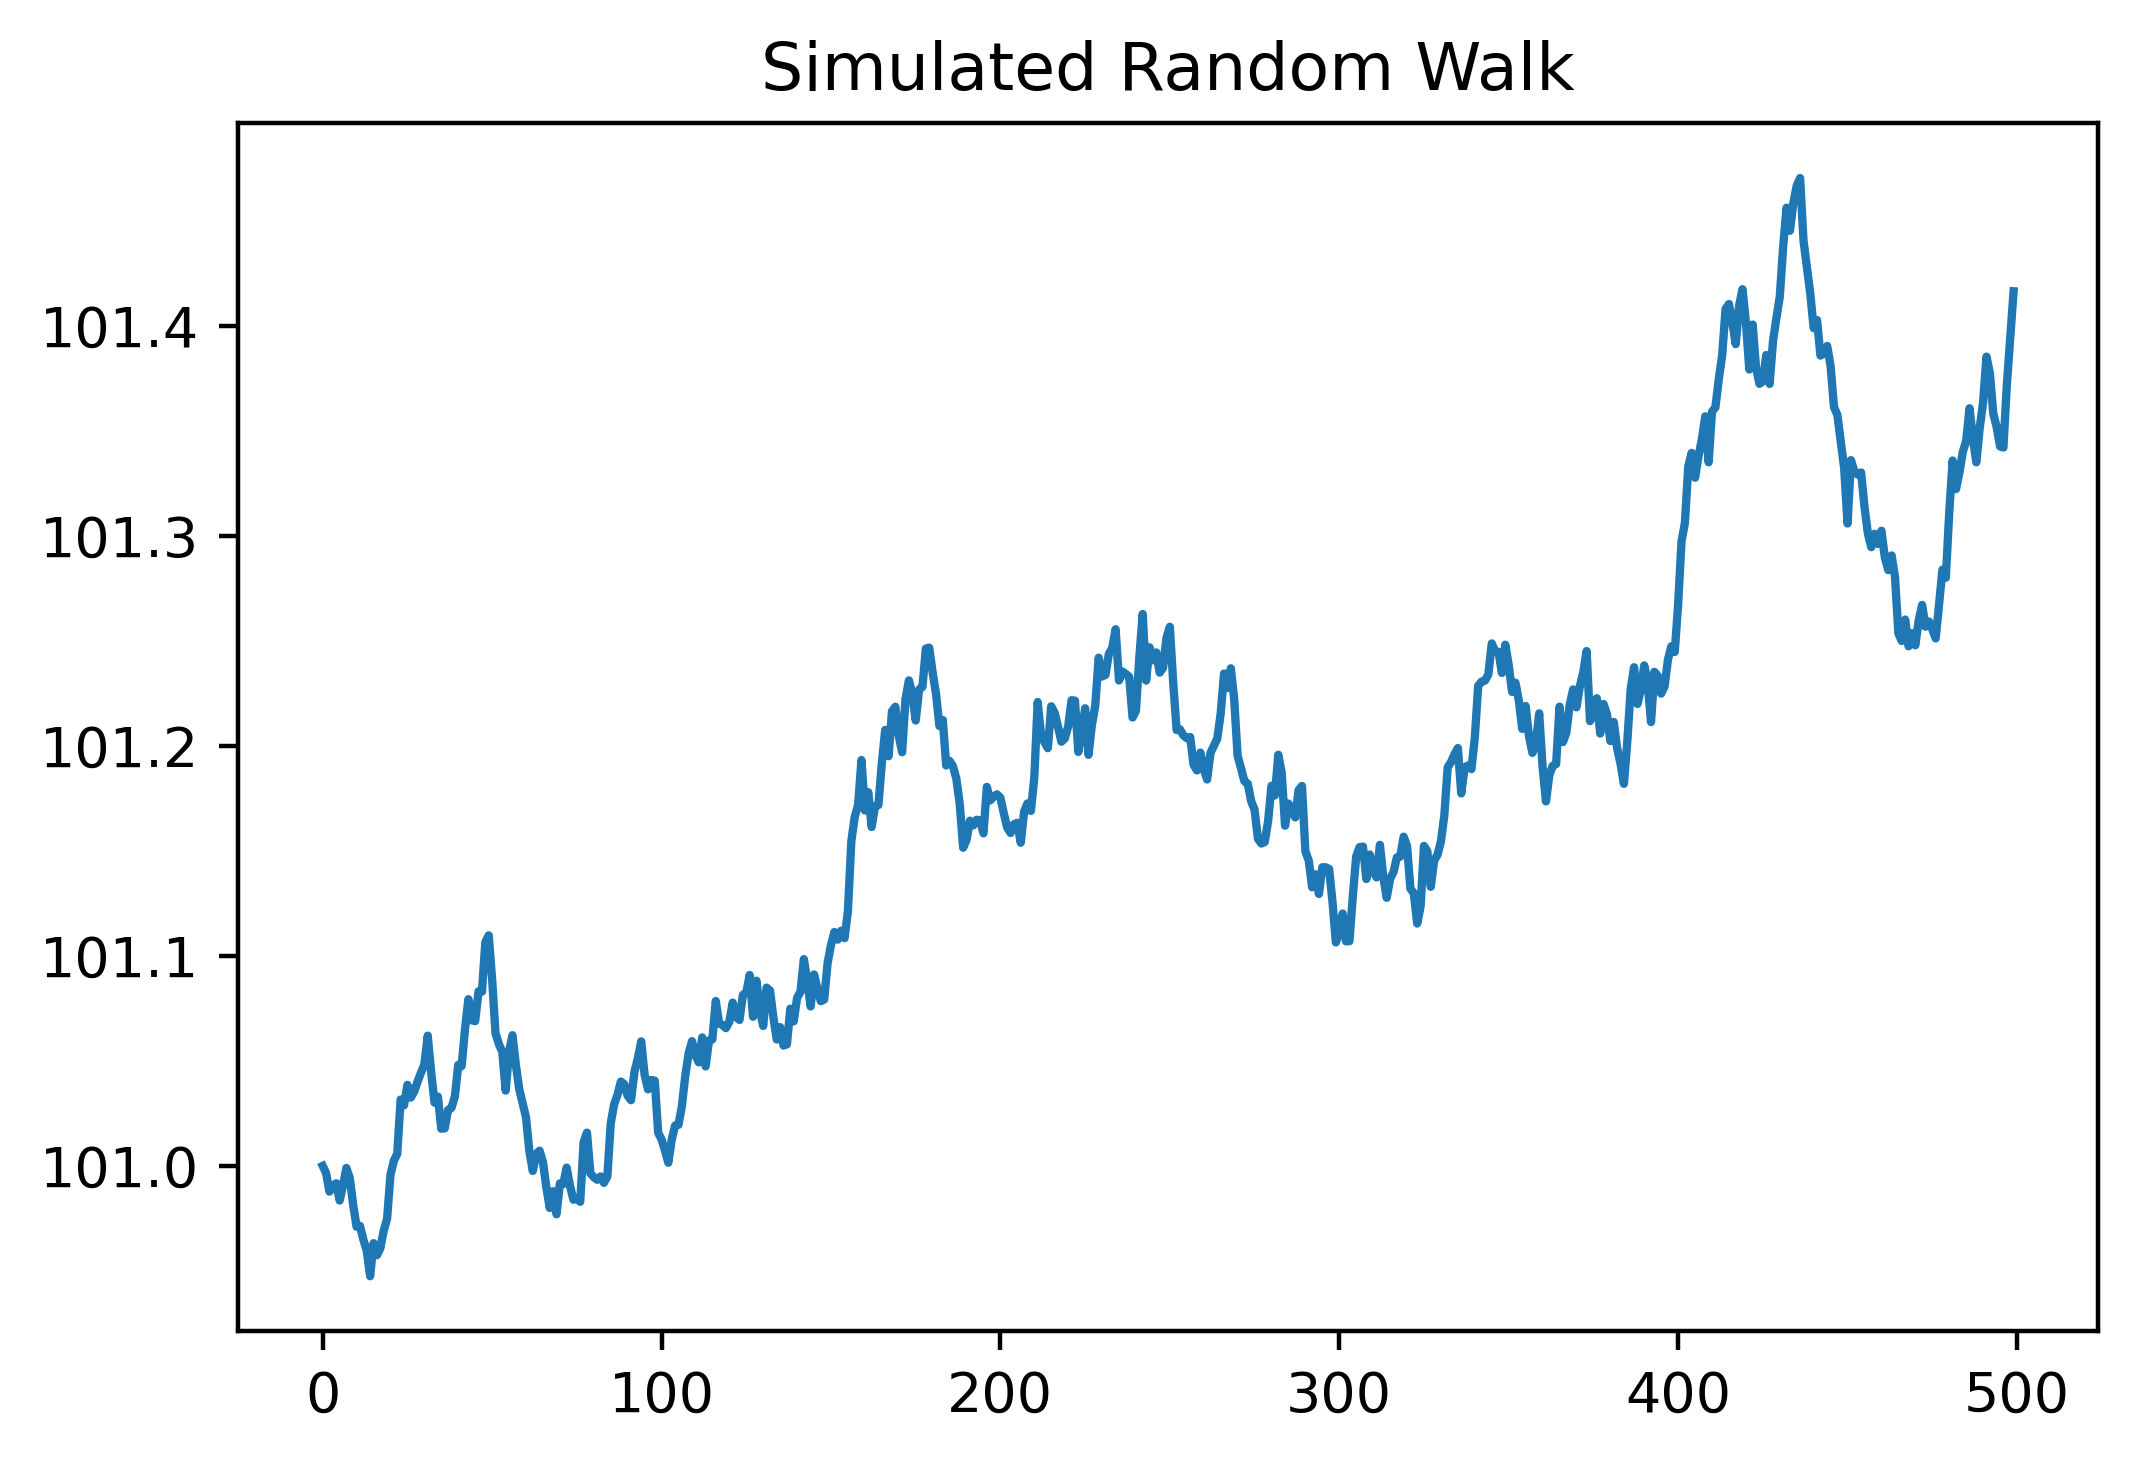

In [32]:
steps = np.random.normal(loc=0.001, scale=0.01, size=500)+1
steps[0]=1
P = 100 + np.cumprod(steps)
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('data/AMZN.csv')

In [62]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [63]:
df = df[['Date', 'Adj Close']]

In [64]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [65]:
df.set_index('Date', inplace=True)

In [66]:
AMZN_returns = df.pct_change()

In [67]:
AMZN_returns = returns.dropna()

In [68]:
AMZN_returns.head()

,Adj Close
Date,
1997-05-16,-0.117021
1997-05-19,-0.012049
1997-05-20,-0.042683
1997-05-21,-0.127389
1997-05-22,-0.021898


In [70]:
results = adfuller(AMZN_returns['Adj Close'])

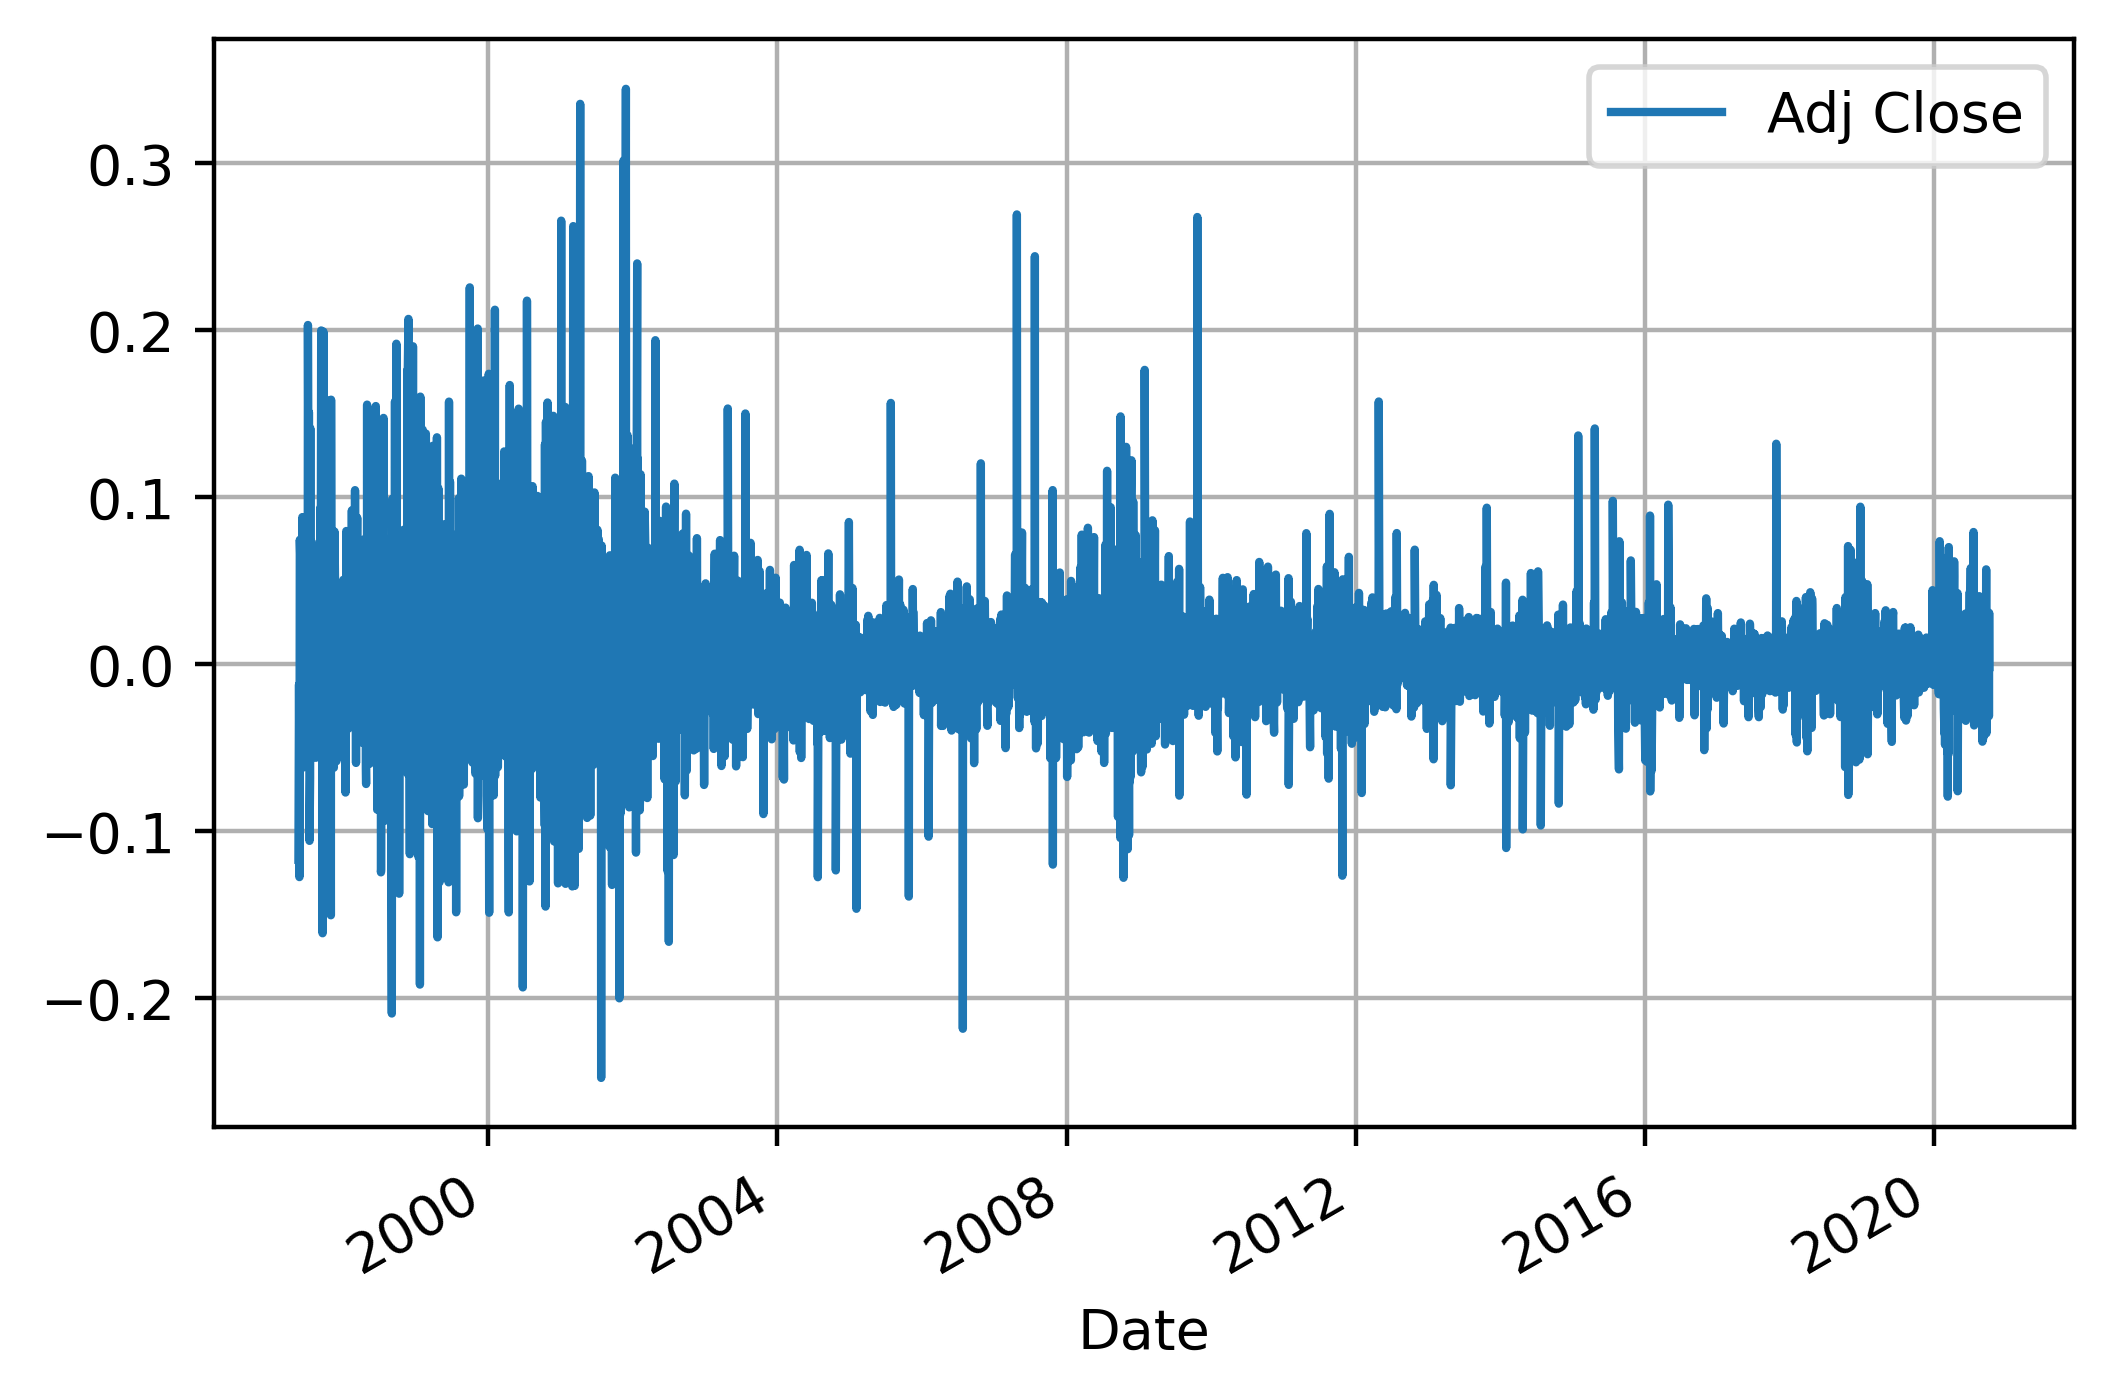

In [86]:
AMZN_returns.plot(grid=True)
plt.show()

In [74]:
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.4469754630252973e-24


In [75]:
AMZN_quarterly = df['Adj Close'].resample('Q').last()

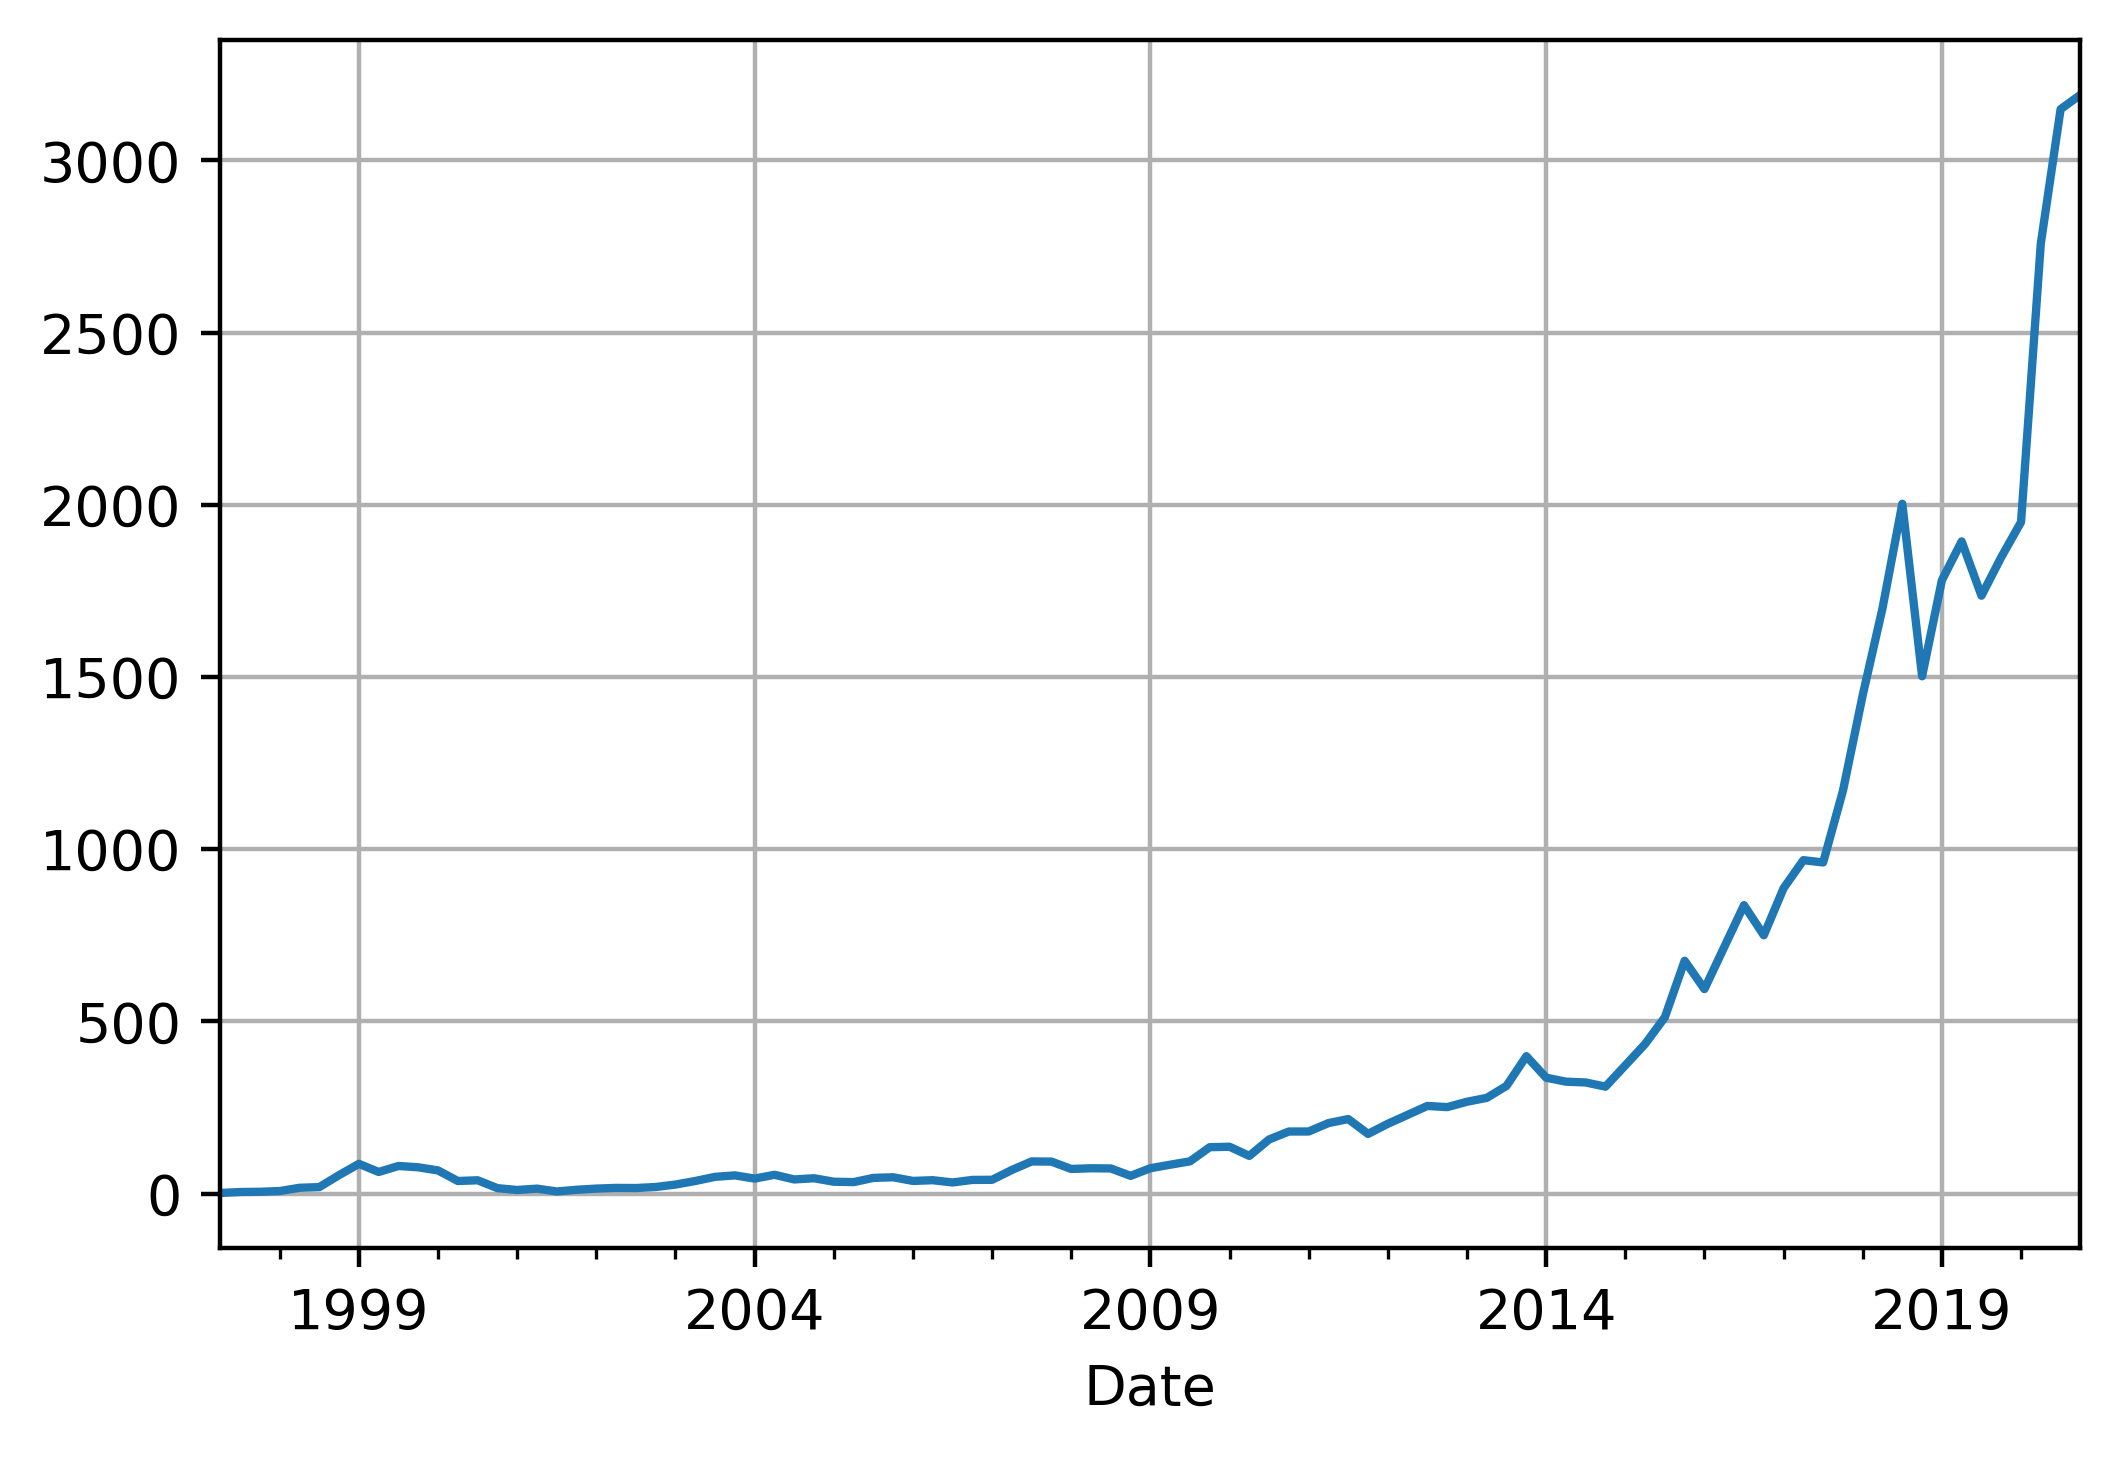

In [87]:
AMZN_quarterly.plot(grid=True)
plt.show()

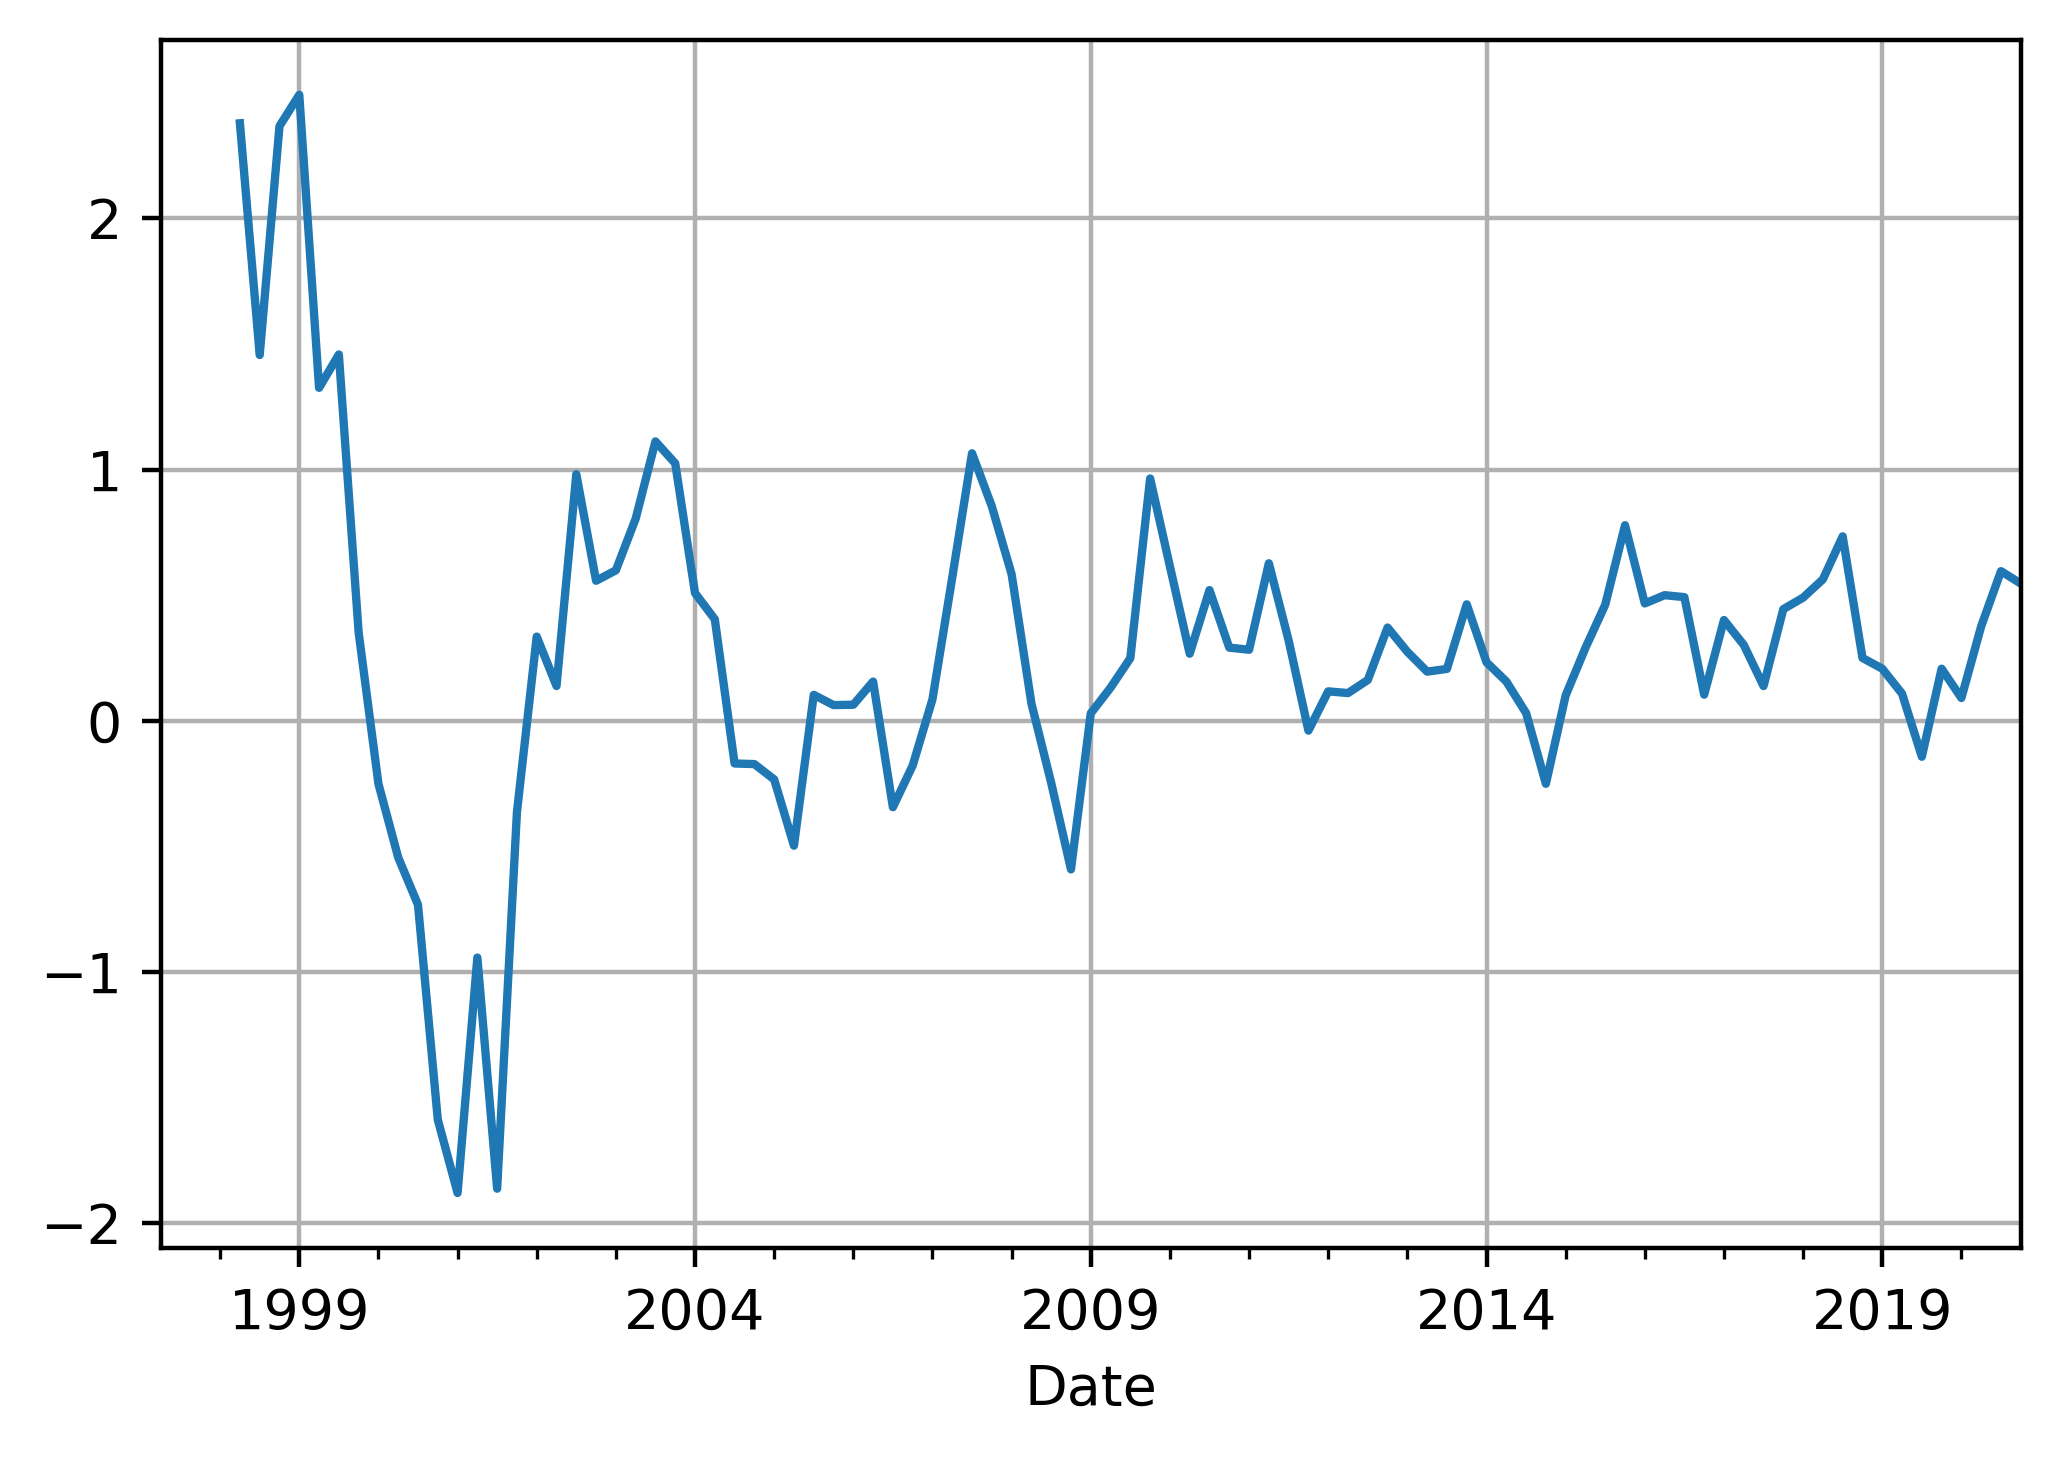

In [89]:
np.log(AMZN_quarterly).diff(4).plot(grid=True)
plt.show()

In [76]:
quarterly_diff = AMZN_quarterly.diff()

In [79]:
quarterly_diff = pd.DataFrame(quarterly_diff)

In [81]:
quarterly_diff.dropna()

,Adj Close
Date,
1997-09-30,2.796875
1997-12-31,0.682291
1998-03-31,2.106771
1998-06-30,9.497396
1998-09-30,1.979166
...,...
2019-12-31,111.929932
2020-03-31,101.880005
2020-06-30,809.100097


[]

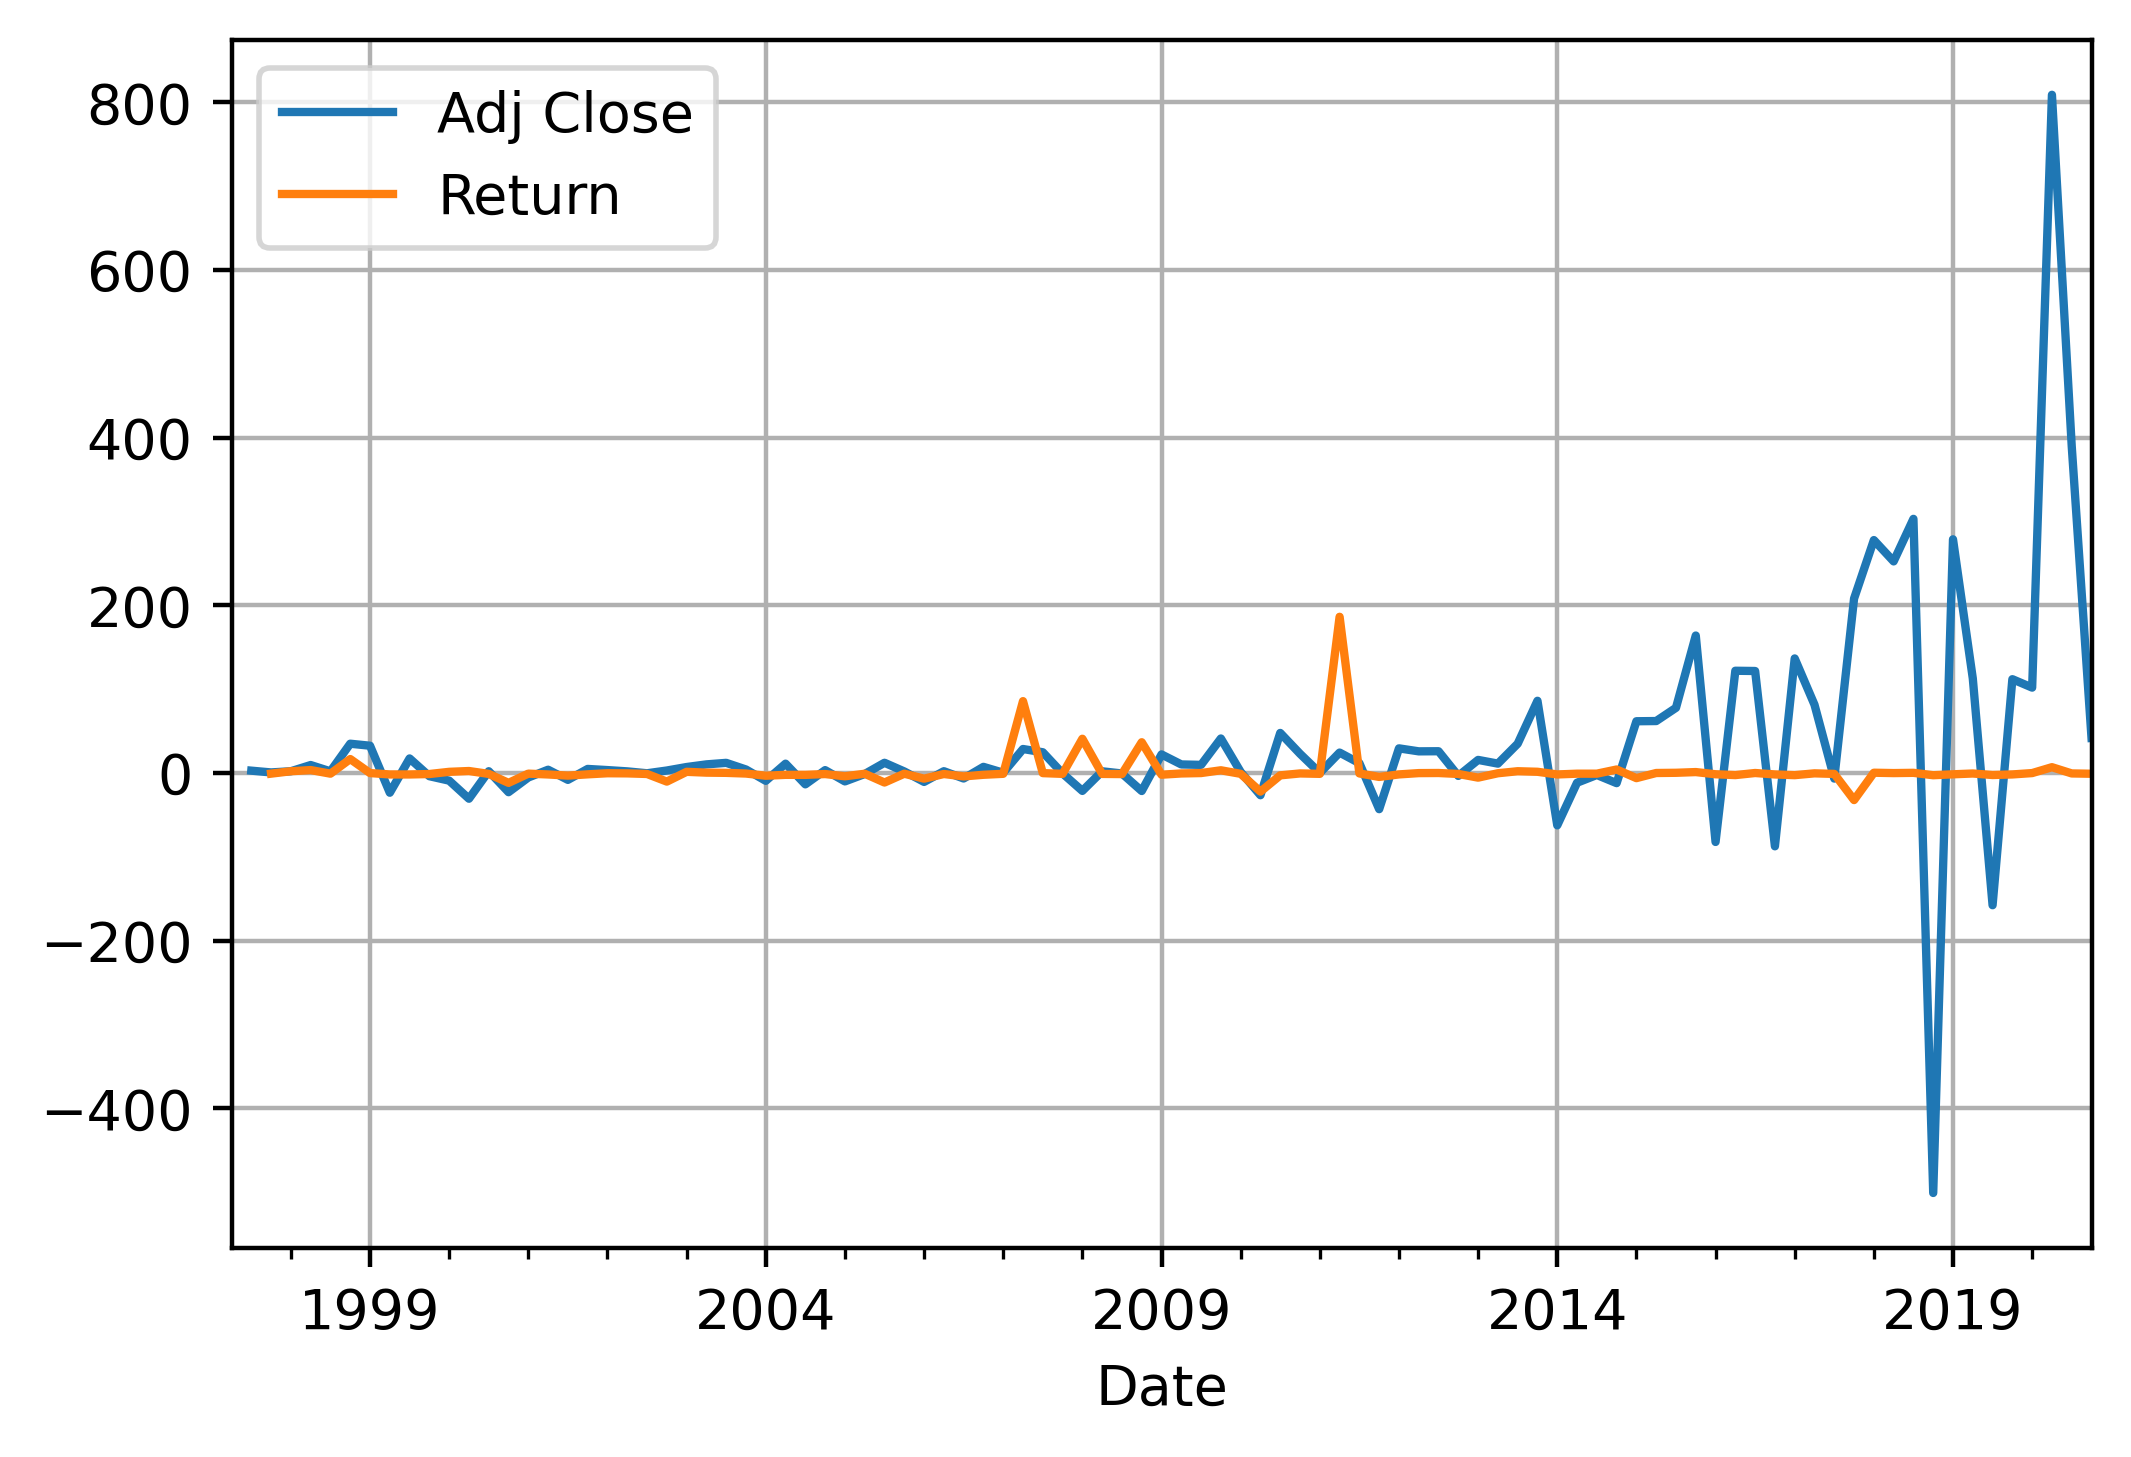

In [88]:
quarterly_diff.plot(grid=True)
plt.plot()

In [82]:
quarterly_diff['Return'] = quarterly_diff['Adj Close'].pct_change()

In [83]:
autocorrelation = quarterly_diff['Return'].autocorr()
autocorrelation

-0.017831636400977416

In [90]:
Quarter = ['2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
       '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
       '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
       '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
       '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3',
       '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
       '2017Q3', '2017Q4']
Earnings = [-0.36, -0.38,  0.07,  1.85, -0.34, -0.42,  0.02,  2.11, -0.39,
       -0.4 ,  0.21,  2.1 , -0.39, -0.37,  0.2 ,  2.14, -0.35, -0.37,
        0.1 ,  2.26, -0.24, -0.38, -0.01,  2.02, -0.38, -0.36, -0.22,
        2.56, -0.42, -0.4 , -0.78,  1.58, -0.4 , -0.46, -0.13,  2.71,
       -0.35, -0.56, -0.34,  3.17, -0.55, -0.67, -0.45,  3.76]

In [91]:
dic = {'Quarter': Quarter, 'Earnings': Earnings}
HRB = pd.DataFrame(dic)

In [93]:
HRB.set_index('Quarter', inplace=True)

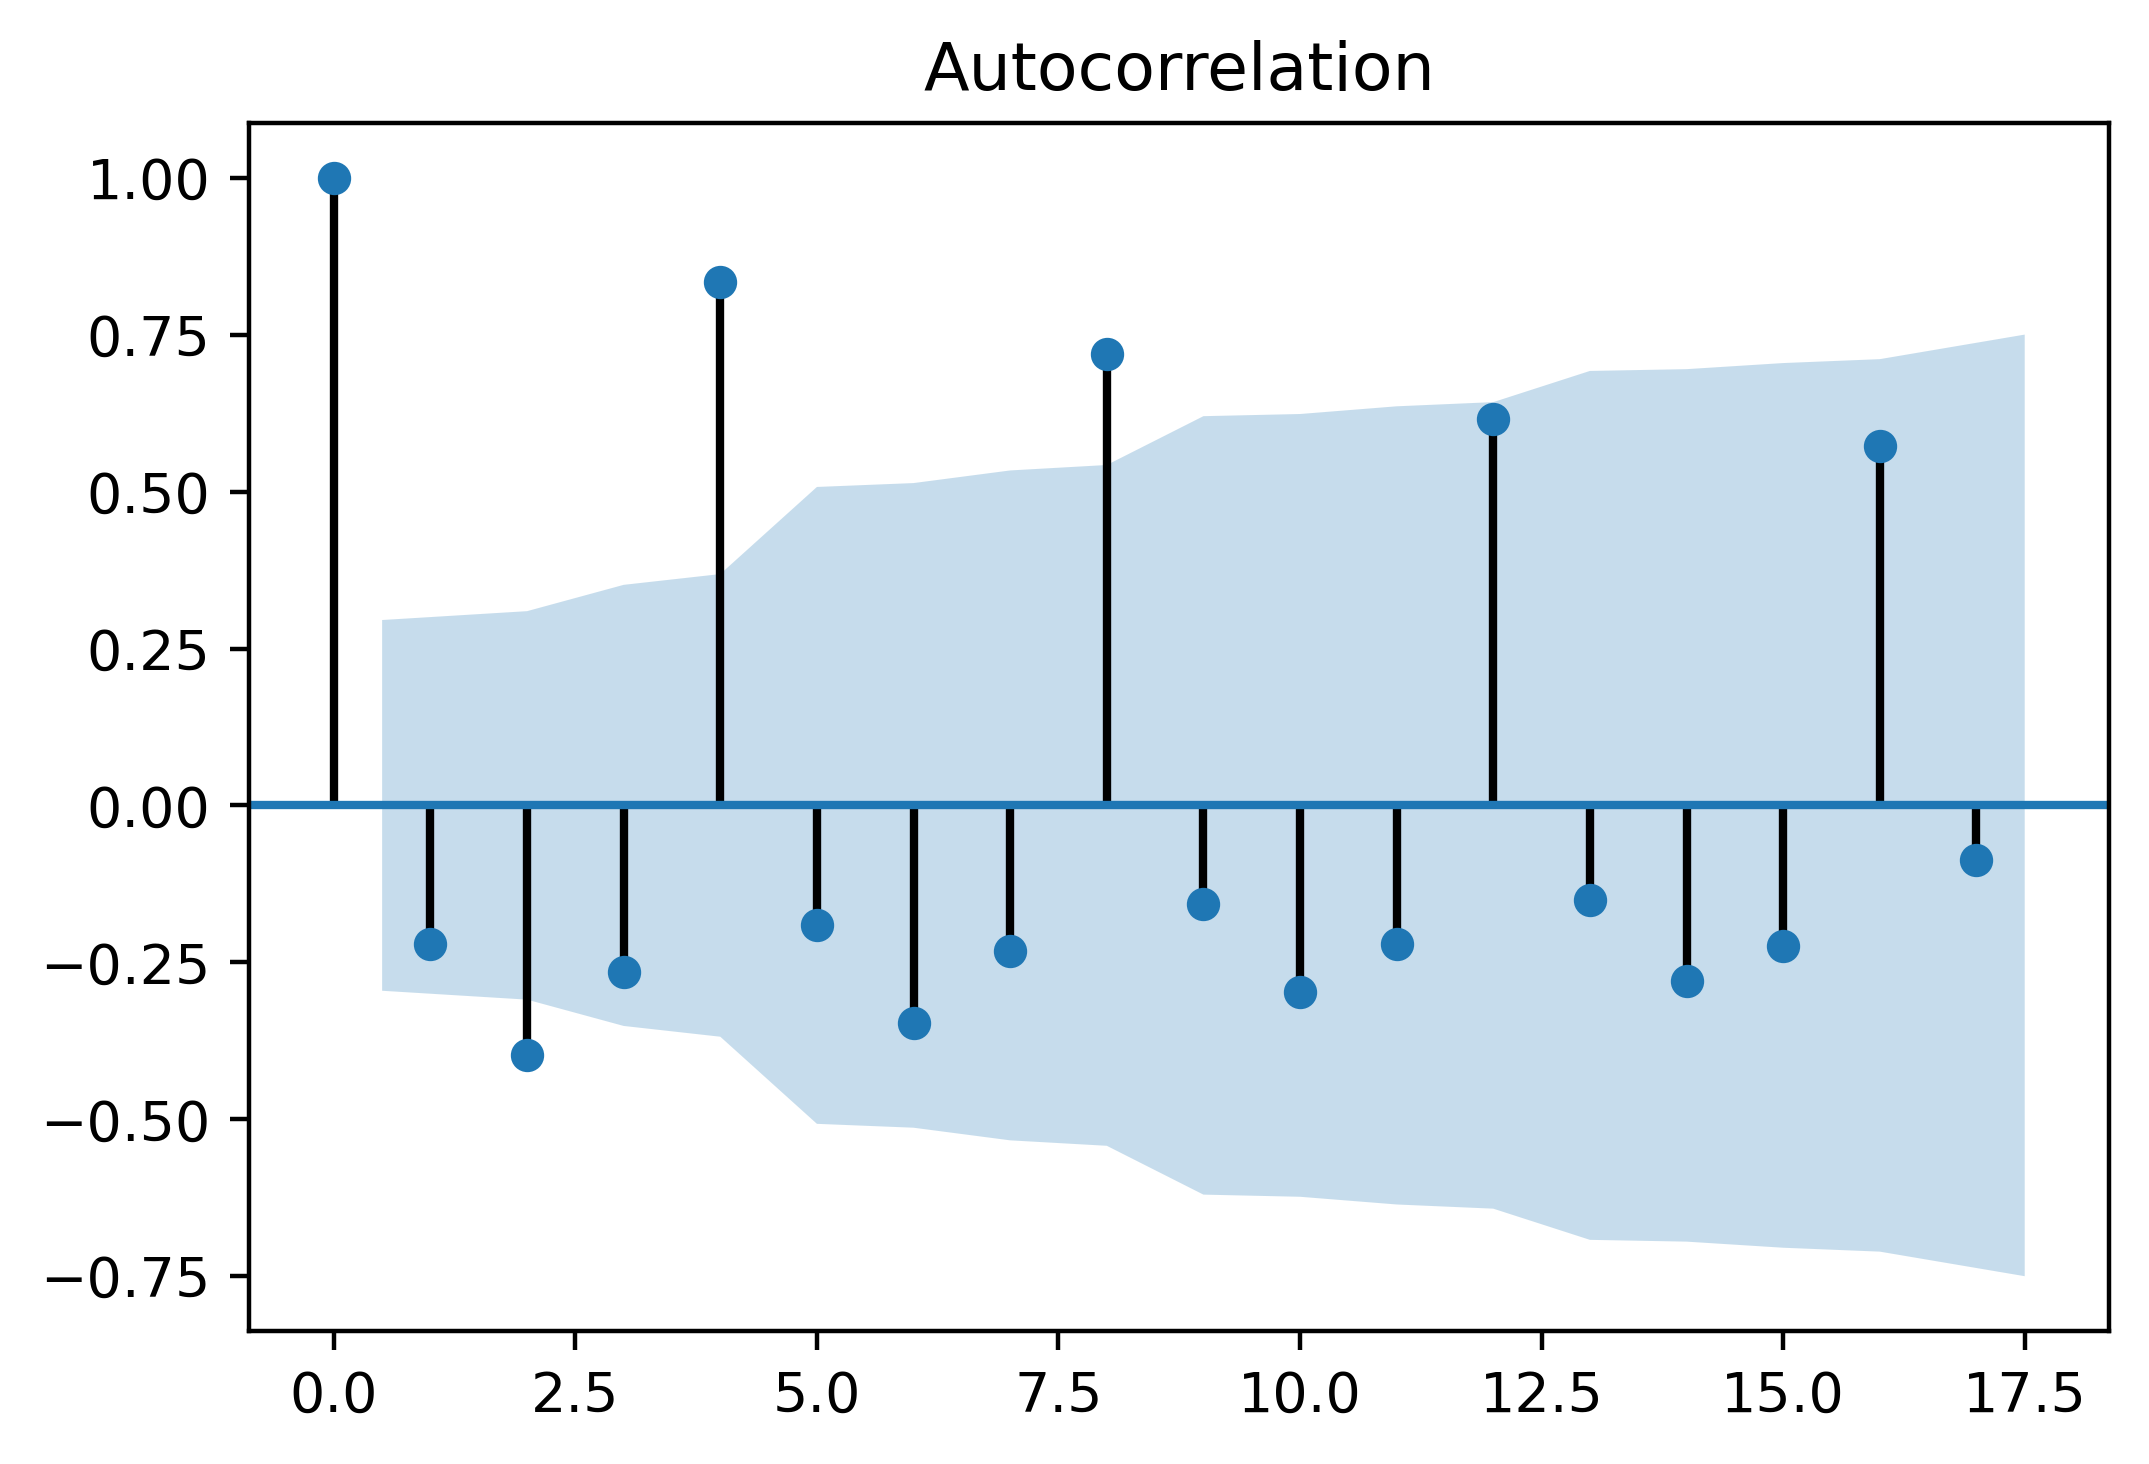

In [104]:
plot_acf(HRB)
plt.show()

In [94]:
HRB.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


In [100]:
HRBseasonadj = HRB.diff(4)
HRBseasonadj = HRBseasonadj.dropna()

In [101]:
print(HRBseasonadj.head(10))

         Earnings
Quarter          
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02
2009Q3       0.19
2009Q4      -0.01
2010Q1       0.00
2010Q2       0.03


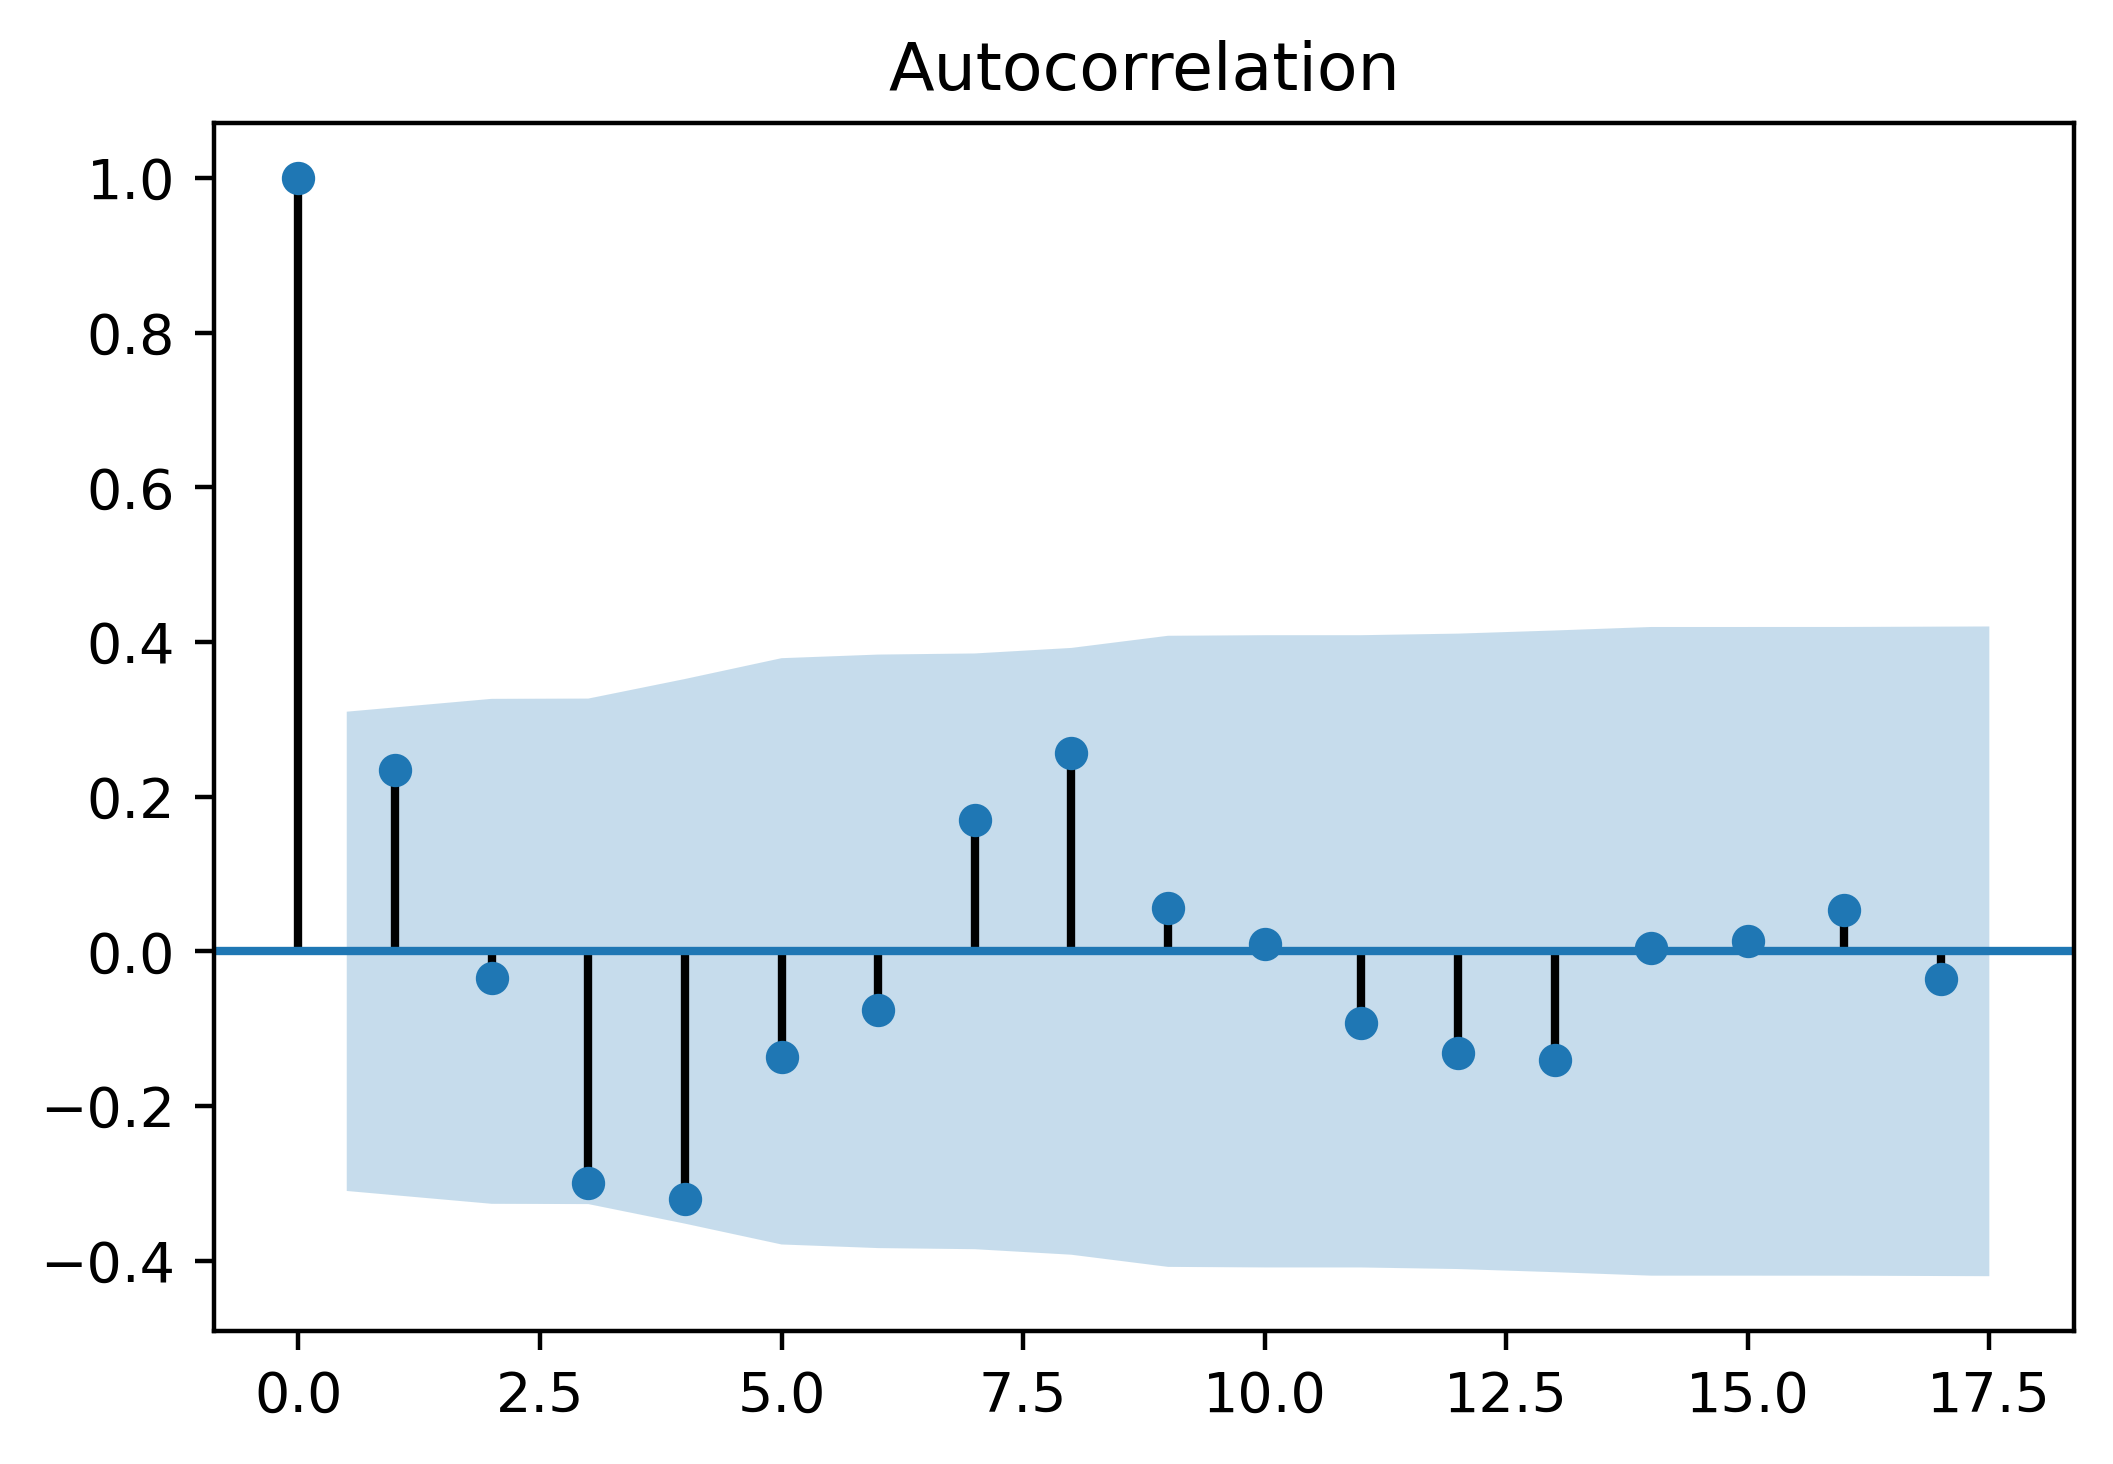

In [103]:
plot_acf(HRBseasonadj)
plt.show()